In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

In [ ]:
# function to find the average
def average_list(values):
    total = 0
    for i in range(0, len(values)):
        total += values[i]
    return total / len(values)

In [ ]:
# function to create graphs for beginning vs end
def lineplot_overall_separate(q, begOverall, endOverall, band_factor=1):

    # calculates average and standard deviation
    avg_beg = np.mean(begOverall)
    avg_end = np.mean(endOverall)
    std_beg = np.std(begOverall, ddof=1)
    std_end = np.std(endOverall, ddof=1)

    # x-axis points
    x = np.linspace(0, 1, 50)

    plt.figure(figsize=(6,4))

    # Beginning line + shaded region
    plt.plot(x, [avg_beg]*len(x), color="blue", label="Beginning")
    plt.fill_between(x,
                     [avg_beg - band_factor*std_beg]*len(x),
                     [avg_beg + band_factor*std_beg]*len(x),
                     alpha=0.2, color="blue")

    # End line + shaded region
    plt.plot(x, [avg_end]*len(x), color="red", label="End")
    plt.fill_between(x,
                     [avg_end - band_factor*std_end]*len(x),
                     [avg_end + band_factor*std_end]*len(x),
                     alpha=0.2, color="red")

    # Plots graph
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to create graphs for male vs female
def lineplot_gender(q, male, female, band_factor=1):

    # --- compute averages & std ---
    avg_male = np.mean(male)
    avg_female = np.mean(female)
    std_male = np.std(male, ddof=1)
    std_female = np.std(female, ddof=1)

    # x-axis points
    x = np.linspace(0, 1, 50)

    plt.figure(figsize=(6,4))

    # Male line and shaded region
    plt.plot(x, [avg_male]*len(x), color="blue", label="Male")
    plt.fill_between(x,
                     [avg_male - band_factor*std_male]*len(x),
                     [avg_male + band_factor*std_male]*len(x),
                     alpha=0.2, color="blue")

    # Female line and shaded region
    plt.plot(x, [avg_female]*len(x), color="#fc03df", label="Female")
    plt.fill_between(x,
                     [avg_female - band_factor*std_female]*len(x),
                     [avg_female + band_factor*std_female]*len(x),
                     alpha=0.2, color="#fc03df")

    # Graphs males vs females
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Gender")
    plt.title(f"{q}: Male vs Female")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to graph a variable beginning vs end
def lineplot_beg_to_end(q, begOverall, endOverall, band_factor=1):

    # --- compute averages ---
    overallAvgBEG = np.mean(begOverall)
    overallAvgEND = np.mean(endOverall)

    # --- compute standard deviations ---
    overallSTD_BE = np.std(begOverall, ddof=1)
    overallSTD_END= np.std(endOverall, ddof=1)

    # --- dataframe for plotting ---
    dfo = pd.DataFrame({"x": [0, 1], "y": [overallAvgBEG, overallAvgEND]})
    sd_overall = np.asarray([overallSTD_BE, overallSTD_END], dtype=float)

    # --- plot ---
    plt.figure(figsize=(6,4))
    sns.lineplot(data=dfo, x="x", y="y", marker="o", color="black")

    x_o, y_o = dfo["x"].to_numpy(dtype=float), dfo["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overall, y_o + band_factor*sd_overall,
                     alpha=0.2, color="gray")

    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End (Overall)")
    plt.tight_layout()
    plt.show()

In [ ]:
# function to add a column for gender
def map_gender(val):
    responses = str(val).split(",")

    cleaned_responses = []

    for r in responses:
        cleaned_responses.append(r.strip().lower())

    for response in cleaned_responses:
        if "female" in response:
            return "Female"
        elif "male" in response:
            return "Male"
        elif "man" in response:
            return "Male"
        elif "woman" in response:
            return "Female"
        elif "f" in response:
            return "Female"
        elif "women" in response:
            return "Female"


    return "Other"

In [ ]:
# function to use Kruskal-Wallis test
def kruskalTest(data1, data2, *args):
    h_stat, p_value = kruskal(data1, data2, *args)

    print(f"Kruskal-Wallis H-Statistic: {h_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# function to use Mann whitney test
def UTest(data1, data2):
    u_value, p_value = mannwhitneyu(data1, data2)

    print(f"Mann-Whitney U-Value: {u_value}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists")

In [ ]:
# reads file
data = pd.read_excel('updateDataset.xlsx', header = 1)

In [ ]:
# calls function to create new column for gender
data["Gender"] = data["Q24"].apply(map_gender)

In [ ]:
# creates dataset for only double responses
data = data.head(105)

In [ ]:
# drops empty row
data = data.drop(index=0)

In [ ]:
# prints first 5 rows
data.head()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,3.0,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Male
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Male
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Male
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Male
5,2022-11-30 07:26:53,2022-11-30 07:28:56,End,Student 3,7.0,NaN,Male,"5,6",NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Male


In [ ]:
# prints last 5 rows
data.tail()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Gender
100,2022-12-04 14:02:00,2022-12-04 14:04:24,End,Student 50,3.0,NaN,Male,"5,2",3.0,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,Male
101,2022-10-24 19:29:01,2022-10-24 19:34:44,Beginning,Student 51,4.0,NaN,Male,3,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
102,2022-11-29 23:11:07,2022-11-29 23:14:29,End,Student 51,4.0,NaN,Male,3,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,Male
103,2022-12-02 10:44:29,2022-12-02 10:46:41,End,Student 52,7.0,NaN,Male,5,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,Male
104,2022-10-05 13:14:23,2022-10-05 13:34:31,Beginning,Student 52,7.0,NaN,Male,5,4.0,3.0,...,3.0,2.0,4.0,1.0,1.0,4.0,1.0,NaN,NaN,Male


In [ ]:
# START OF QUESTION 3

In [ ]:
# overall Q3_1 Test Beginning vs End
begQ3_1overallALL = data[data["B/E?"] == "Beginning"]["Q3_1"].dropna()

endQ3_1overallALL = data[data["B/E?"] == "End"]["Q3_1"].dropna()

UTest(begQ3_1overallALL, endQ3_1overallALL)

Mann-Whitney U-Value: 884.0
P-value: 0.669774578404811
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_1
# mean for Q3_1
Q3_1_result = data.groupby(["Gender", "B/E?"])["Q3_1"].mean()
print("Q3_1 Mean")
print(Q3_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
male_beginning_Q3_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()

female_end_Q3_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_1"].dropna()
male_end_Q3_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_1"].dropna()

# Q3_1: U-Test comparing genders in the beginning
print("Q3_1 Genders in the Beginning:")
UTest(female_beginning_Q3_1, male_beginning_Q3_1)

# Q3_1: U-Test comparing genders in the end
print()
print("Q3_1 Genders in the End:")
UTest(female_end_Q3_1, male_end_Q3_1)

# Q3_1 U-Test comparing females in the beginning vs end
print()
print("Q3_1 Females:")
UTest(female_beginning_Q3_1, female_end_Q3_1)

# Q3_1 U-Test comparing males in the beginning vs end
print()
print("Q3_1 Males:")
UTest(male_beginning_Q3_1, male_end_Q3_1)

Q3_1 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.058824
Male    Beginning    4.000000
        End          3.695652
Other   End               NaN
Name: Q3_1, dtype: float64 

Q3_1 Genders in the Beginning:
Mann-Whitney U-Value: 199.0
P-value: 0.7214833718113554
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Genders in the End:
Mann-Whitney U-Value: 234.5
P-value: 0.2699573019052801
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Females:
Mann-Whitney U-Value: 127.0
P-value: 0.5240783152146593
Fail to reject the null hypothesis: No significant differences exists

Q3_1 Males:
Mann-Whitney U-Value: 331.0
P-value: 0.35385340284993394
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_2 Test Beginning vs End
begQ3_2overallALL = data[data["B/E?"] == "Beginning"]["Q3_2"].dropna()

endQ3_2overallALL = data[data["B/E?"] == "End"]["Q3_2"].dropna()

UTest(begQ3_2overallALL, endQ3_2overallALL)

Mann-Whitney U-Value: 849.5
P-value: 0.9132241281970954
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_2
# mean for Q3_2
Q3_2_result = data.groupby(["Gender", "B/E?"])["Q3_2"].mean()
print("Q3_2 Mean")
print(Q3_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
male_beginning_Q3_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()

female_end_Q3_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_2"].dropna()
male_end_Q3_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_2"].dropna()

# Q3_2: U-Test comparing genders in the beginning
print("Q3_2 Genders in the Beginning:")
UTest(female_beginning_Q3_2, male_beginning_Q3_2)

# Q3_2: U-Test comparing genders in the end
print()
print("Q3_2 Genders in the End:")
UTest(female_end_Q3_2, male_end_Q3_2)

# Q3_2 U-Test comparing females in the beginning vs end
print()
print("Q3_2 Females:")
UTest(female_beginning_Q3_2, female_end_Q3_2)

# Q3_2 U-Test comparing males in the beginning vs end
print()
print("Q3_2 Males:")
UTest(male_beginning_Q3_2, male_end_Q3_2)

Q3_2 Mean
Gender  B/E?     
Female  Beginning    4.352941
        End          4.294118
Male    Beginning    4.280000
        End          4.217391
Other   End          5.000000
Name: Q3_2, dtype: float64 

Q3_2 Genders in the Beginning:
Mann-Whitney U-Value: 226.0
P-value: 0.7142116170161622
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Genders in the End:
Mann-Whitney U-Value: 203.5
P-value: 0.8235364440164679
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Females:
Mann-Whitney U-Value: 146.0
P-value: 0.9699567088007018
Fail to reject the null hypothesis: No significant differences exists

Q3_2 Males:
Mann-Whitney U-Value: 286.0
P-value: 0.9821568843381373
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_3 Test Beginning vs End
begQ3_3overallALL = data[data["B/E?"] == "Beginning"]["Q3_3"].dropna()

endQ3_3overallALL = data[data["B/E?"] == "End"]["Q3_3"].dropna()

UTest(begQ3_3overallALL, endQ3_3overallALL)

Mann-Whitney U-Value: 958.5
P-value: 0.3430592692005652
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_3
# mean for Q3_3
Q3_3_result = data.groupby(["Gender", "B/E?"])["Q3_3"].mean()
print("Q3_3 Mean")
print(Q3_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
male_beginning_Q3_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()

female_end_Q3_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_3"].dropna()
male_end_Q3_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_3"].dropna()

# Q3_3: U-Test comparing genders in the beginning
print("Q3_3 Genders in the Beginning:")
UTest(female_beginning_Q3_3, male_beginning_Q3_3)

# Q3_3: U-Test comparing genders in the end
print()
print("Q3_3 Genders in the End:")
UTest(female_end_Q3_3, male_end_Q3_3)

# Q3_3 U-Test comparing females in the beginning vs end
print()
print("Q3_3 Females:")
UTest(female_beginning_Q3_3, female_end_Q3_3)

# Q3_3 U-Test comparing males in the beginning vs end
print()
print("Q3_3 Males:")
UTest(male_beginning_Q3_3, male_end_Q3_3)

Q3_3 Mean
Gender  B/E?     
Female  Beginning    4.352941
        End          4.176471
Male    Beginning    4.160000
        End          4.000000
Other   End          5.000000
Name: Q3_3, dtype: float64 

Q3_3 Genders in the Beginning:
Mann-Whitney U-Value: 242.5
P-value: 0.4085742522523952
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Genders in the End:
Mann-Whitney U-Value: 216.0
P-value: 0.5616225414053264
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Females:
Mann-Whitney U-Value: 163.0
P-value: 0.49631966620582724
Fail to reject the null hypothesis: No significant differences exists

Q3_3 Males:
Mann-Whitney U-Value: 326.5
P-value: 0.39487724003946845
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_4 Test Beginning vs End
begQ3_4overallALL = data[data["B/E?"] == "Beginning"]["Q3_4"].dropna()

endQ3_4overallALL = data[data["B/E?"] == "End"]["Q3_4"].dropna()

UTest(begQ3_4overallALL, endQ3_4overallALL)

Mann-Whitney U-Value: 866.5
P-value: 0.9612615654289047
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_4
# mean for Q3_4
Q3_4_result = data.groupby(["Gender", "B/E?"])["Q3_4"].mean()
print("Q3_4 Mean")
print(Q3_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
male_beginning_Q3_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()

female_end_Q3_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_4"].dropna()
male_end_Q3_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_4"].dropna()

# Q3_4: U-Test comparing genders in the beginning
print("Q3_4 Genders in the Beginning:")
UTest(female_beginning_Q3_4, male_beginning_Q3_4)

# Q3_4: U-Test comparing genders in the end
print()
print("Q3_4 Genders in the End:")
UTest(female_end_Q3_4, male_end_Q3_4)

# Q3_4 U-Test comparing females in the beginning vs end
print()
print("Q3_4 Females:")
UTest(female_beginning_Q3_4, female_end_Q3_4)

# Q3_4 U-Test comparing males in the beginning vs end
print()
print("Q3_4 Males:")
UTest(male_beginning_Q3_4, male_end_Q3_4)

Q3_4 Mean
Gender  B/E?     
Female  Beginning    4.352941
        End          4.117647
Male    Beginning    3.920000
        End          4.130435
Other   End          5.000000
Name: Q3_4, dtype: float64 

Q3_4 Genders in the Beginning:
Mann-Whitney U-Value: 254.0
P-value: 0.2620668995154751
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Genders in the End:
Mann-Whitney U-Value: 192.0
P-value: 0.9303664704045437
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Females:
Mann-Whitney U-Value: 166.5
P-value: 0.4240336802823905
Fail to reject the null hypothesis: No significant differences exists

Q3_4 Males:
Mann-Whitney U-Value: 267.5
P-value: 0.6704671756699188
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_5 Test Beginning vs End
begQ3_5overallALL = data[data["B/E?"] == "Beginning"]["Q3_5"].dropna()

endQ3_5overallALL = data[data["B/E?"] == "End"]["Q3_5"].dropna()

UTest(begQ3_5overallALL, endQ3_5overallALL)

Mann-Whitney U-Value: 849.5
P-value: 0.9135230448664791
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_5
# mean for Q3_5
Q3_5_result = data.groupby(["Gender", "B/E?"])["Q3_5"].mean()
print("Q3_5 Mean")
print(Q3_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
male_beginning_Q3_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()

female_end_Q3_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_5"].dropna()
male_end_Q3_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_5"].dropna()

# Q3_5: U-Test comparing genders in the beginning
print("Q3_5 Genders in the Beginning:")
UTest(female_beginning_Q3_5, male_beginning_Q3_5)

# Q3_5: U-Test comparing genders in the end
print()
print("Q3_5 Genders in the End:")
UTest(female_end_Q3_5, male_end_Q3_5)

# Q3_5 U-Test comparing females in the beginning vs end
print()
print("Q3_5 Females:")
UTest(female_beginning_Q3_5, female_end_Q3_5)

# Q3_5 U-Test comparing males in the beginning vs end
print()
print("Q3_5 Males:")
UTest(male_beginning_Q3_5, male_end_Q3_5)

Q3_5 Mean
Gender  B/E?     
Female  Beginning    4.235294
        End          4.411765
Male    Beginning    4.120000
        End          4.086957
Other   End          4.000000
Name: Q3_5, dtype: float64 

Q3_5 Genders in the Beginning:
Mann-Whitney U-Value: 231.0
P-value: 0.6170386306940314
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Genders in the End:
Mann-Whitney U-Value: 243.5
P-value: 0.15973787571671016
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Females:
Mann-Whitney U-Value: 128.5
P-value: 0.5569148956685379
Fail to reject the null hypothesis: No significant differences exists

Q3_5 Males:
Mann-Whitney U-Value: 301.0
P-value: 0.7724079706243946
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_6 Test Beginning vs End
begQ3_6overallALL = data[data["B/E?"] == "Beginning"]["Q3_6"].dropna()

endQ3_6overallALL = data[data["B/E?"] == "End"]["Q3_6"].dropna()

UTest(begQ3_6overallALL, endQ3_6overallALL)

Mann-Whitney U-Value: 931.0
P-value: 0.3606893062815515
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_6
# mean for Q3_6
Q3_6_result = data.groupby(["Gender", "B/E?"])["Q3_6"].mean()
print("Q3_6 Mean")
print(Q3_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
male_beginning_Q3_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()

female_end_Q3_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_6"].dropna()
male_end_Q3_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_6"].dropna()

# Q3_6: U-Test comparing genders in the beginning
print("Q3_6 Genders in the Beginning:")
UTest(female_beginning_Q3_6, male_beginning_Q3_6)

# Q3_6: U-Test comparing genders in the end
print()
print("Q3_6 Genders in the End:")
UTest(female_end_Q3_6, male_end_Q3_6)

# Q3_6 U-Test comparing females in the beginning vs end
print()
print("Q3_6 Females:")
UTest(female_beginning_Q3_6, female_end_Q3_6)

# Q3_6 U-Test comparing males in the beginning vs end
print()
print("Q3_6 Males:")
UTest(male_beginning_Q3_6, male_end_Q3_6)

Q3_6 Mean
Gender  B/E?     
Female  Beginning    4.294118
        End          4.187500
Male    Beginning    4.320000
        End          4.043478
Other   End          5.000000
Name: Q3_6, dtype: float64 

Q3_6 Genders in the Beginning:
Mann-Whitney U-Value: 205.0
P-value: 0.8388494977702163
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Genders in the End:
Mann-Whitney U-Value: 195.5
P-value: 0.7385927126152669
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Females:
Mann-Whitney U-Value: 146.0
P-value: 0.7098951950951891
Fail to reject the null hypothesis: No significant differences exists

Q3_6 Males:
Mann-Whitney U-Value: 333.5
P-value: 0.3066208507011916
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_7 Test Beginning vs End
begQ3_7overallALL = data[data["B/E?"] == "Beginning"]["Q3_7"].dropna()

endQ3_7overallALL = data[data["B/E?"] == "End"]["Q3_7"].dropna()

UTest(begQ3_7overallALL, endQ3_7overallALL)

Mann-Whitney U-Value: 991.0
P-value: 0.2025388388814111
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_7
# mean for Q3_7
Q3_7_result = data.groupby(["Gender", "B/E?"])["Q3_7"].mean()
print("Q3_7 Mean")
print(Q3_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
male_beginning_Q3_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()

female_end_Q3_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_7"].dropna()
male_end_Q3_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_7"].dropna()

# Q3_7: U-Test comparing genders in the beginning
print("Q3_7 Genders in the Beginning:")
UTest(female_beginning_Q3_7, male_beginning_Q3_7)

# Q3_7: U-Test comparing genders in the end
print()
print("Q3_7 Genders in the End:")
UTest(female_end_Q3_7, male_end_Q3_7)

# Q3_7 U-Test comparing females in the beginning vs end
print()
print("Q3_7 Females:")
UTest(female_beginning_Q3_7, female_end_Q3_7)

# Q3_7 U-Test comparing males in the beginning vs end
print()
print("Q3_7 Males:")
UTest(male_beginning_Q3_7, male_end_Q3_7)

Q3_7 Mean
Gender  B/E?     
Female  Beginning    4.411765
        End          4.235294
Male    Beginning    4.240000
        End          4.043478
Other   End          5.000000
Name: Q3_7, dtype: float64 

Q3_7 Genders in the Beginning:
Mann-Whitney U-Value: 236.0
P-value: 0.5148376472961218
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Genders in the End:
Mann-Whitney U-Value: 220.5
P-value: 0.4747480749548183
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Females:
Mann-Whitney U-Value: 169.0
P-value: 0.3642448793107135
Fail to reject the null hypothesis: No significant differences exists

Q3_7 Males:
Mann-Whitney U-Value: 337.5
P-value: 0.2746728752776352
Fail to reject the null hypothesis: No significant differences exists


Mann-Whitney U-Value: 1046.0
P-value: 0.03777157223715497
Reject the null hypothesis: Significant differences exists
Q3_8: Beginning Avg: 4.4523809523809526
Q3_8 End Average: 4.075
0.5856368512499448
0.8181534085976786


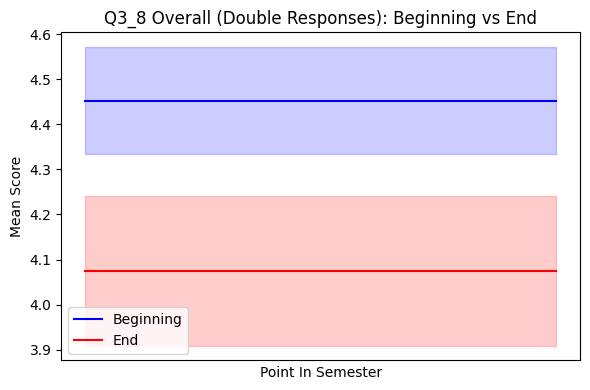

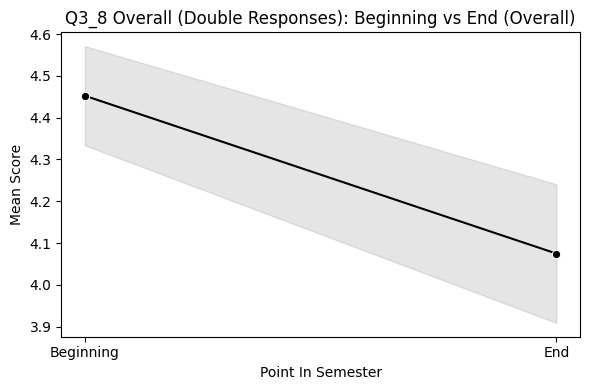

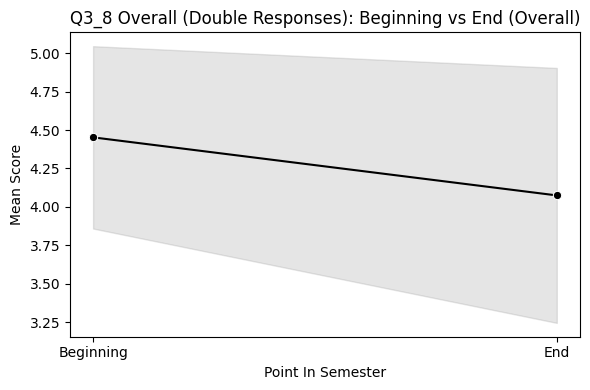

In [ ]:
# overall Q3_8 Test Beginning vs End
begQ3_8overallALL = data[data["B/E?"] == "Beginning"]["Q3_8"].dropna().tolist()

endQ3_8overallALL = data[data["B/E?"] == "End"]["Q3_8"].dropna().tolist()

UTest(begQ3_8overallALL, endQ3_8overallALL)
Q3_8_OverallBEGAvg   = average_list(begQ3_8overallALL)
Q3_8_OverallENDAvg   = average_list(endQ3_8overallALL)

Q3_8_OverallBEGSTD = np.std(begQ3_8overallALL)
Q3_8_OverallENDSTD = np.std(endQ3_8overallALL)

print(f"Q3_8: Beginning Avg: {Q3_8_OverallBEGAvg}")
print(f"Q3_8 End Average: {Q3_8_OverallENDAvg}")
print(Q3_8_OverallBEGSTD)
print(Q3_8_OverallENDSTD)

lineplot_overall_separate("Q3_8 Overall (Double Responses)",
    begOverall=begQ3_8overallALL,
    endOverall=endQ3_8overallALL, band_factor=0.20
)
lineplot_beg_to_end("Q3_8 Overall (Double Responses)",
    begOverall=begQ3_8overallALL,
    endOverall=endQ3_8overallALL,
    band_factor=0.2
)
lineplot_beg_to_end("Q3_8 Overall (Double Responses)",
    begOverall=begQ3_8overallALL,
    endOverall=endQ3_8overallALL
)

In [ ]:
# Q3_8
# mean for Q3_8
Q3_8_result = data.groupby(["Gender", "B/E?"])["Q3_8"].mean()
print("Q3_8 Mean")
print(Q3_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
male_beginning_Q3_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()

female_end_Q3_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_8"].dropna()
male_end_Q3_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_8"].dropna()

# Q3_8: U-Test comparing genders in the beginning
print("Q3_8 Genders in the Beginning:")
UTest(female_beginning_Q3_8, male_beginning_Q3_8)

# Q3_8: U-Test comparing genders in the end
print()
print("Q3_8 Genders in the End:")
UTest(female_end_Q3_8, male_end_Q3_8)

# Q3_8 U-Test comparing females in the beginning vs end
print()
print("Q3_8 Females:")
UTest(female_beginning_Q3_8, female_end_Q3_8)

# Q3_8 U-Test comparing males in the beginning vs end
print()
print("Q3_8 Males:")
UTest(male_beginning_Q3_8, male_end_Q3_8)

Q3_8 Mean
Gender  B/E?     
Female  Beginning    4.411765
        End          4.187500
Male    Beginning    4.480000
        End          3.956522
Other   End          5.000000
Name: Q3_8, dtype: float64 

Q3_8 Genders in the Beginning:
Mann-Whitney U-Value: 210.0
P-value: 0.9538070417837203
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Genders in the End:
Mann-Whitney U-Value: 209.5
P-value: 0.447272371543992
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Females:
Mann-Whitney U-Value: 159.0
P-value: 0.37716041582771076
Fail to reject the null hypothesis: No significant differences exists

Q3_8 Males:
Mann-Whitney U-Value: 383.5
P-value: 0.03153246359991749
Reject the null hypothesis: Significant differences exists


Q3_8: Beginning Avg: 4.48
Q3_8 End Average: 3.9565217391304346
0.49959983987187184
0.8586268547013695


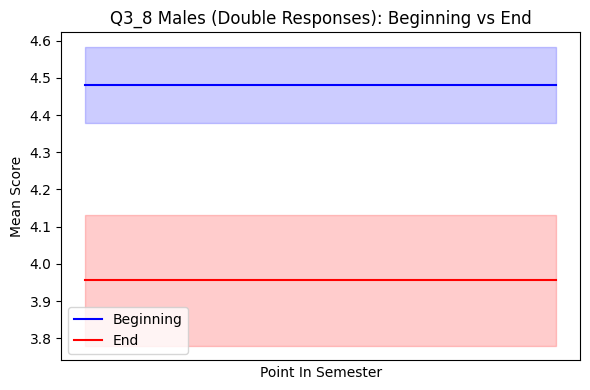

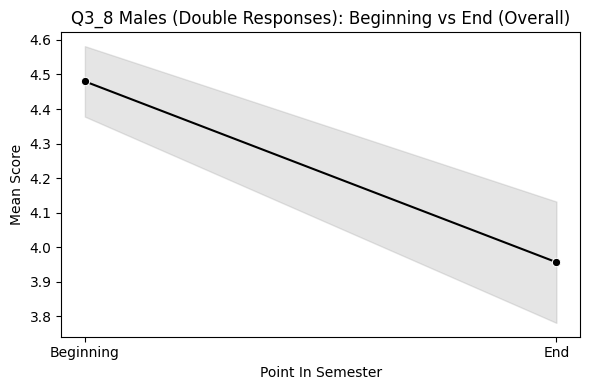

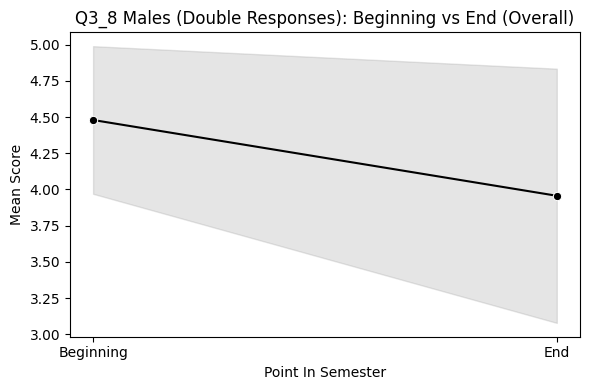

In [ ]:
# Q3_8: graphs and calculates average and standard deviations (males)
male_beginning_Q3_8 = male_beginning_Q3_8.tolist()
male_end_Q3_8 = male_end_Q3_8.tolist()

Q3_8_MalelBEGAvg   = average_list(male_beginning_Q3_8)
Q3_8_MaleENDAvg   = average_list(male_end_Q3_8)

Q3_8_MaleBEGSTD = np.std(male_beginning_Q3_8)
Q3_8_MaleENDSTD = np.std(male_end_Q3_8)

print(f"Q3_8: Beginning Avg: {Q3_8_MalelBEGAvg}")
print(f"Q3_8 End Average: {Q3_8_MaleENDAvg}")
print(Q3_8_MaleBEGSTD)
print(Q3_8_MaleENDSTD)

lineplot_overall_separate("Q3_8 Males (Double Responses)",
    begOverall=male_beginning_Q3_8,
    endOverall=male_end_Q3_8, band_factor=0.20
)

lineplot_beg_to_end("Q3_8 Males (Double Responses)",
    begOverall=male_beginning_Q3_8,
    endOverall=male_end_Q3_8, band_factor=0.2)

lineplot_beg_to_end("Q3_8 Males (Double Responses)",
    begOverall=male_beginning_Q3_8,
    endOverall=male_end_Q3_8)

In [ ]:
# overall Q3_9 Test Beginning vs End
begQ3_9overallALL = data[data["B/E?"] == "Beginning"]["Q3_9"].dropna()

endQ3_9overallALL = data[data["B/E?"] == "End"]["Q3_9"].dropna()

UTest(begQ3_9overallALL, endQ3_9overallALL)

Mann-Whitney U-Value: 901.5
P-value: 0.7000464105373944
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_9
# mean for Q3_9
Q3_9_result = data.groupby(["Gender", "B/E?"])["Q3_9"].mean()
print("Q3_9 Mean")
print(Q3_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
male_beginning_Q3_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()

female_end_Q3_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_9"].dropna()
male_end_Q3_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_9"].dropna()

# Q3_9: U-Test comparing genders in the beginning
print("Q3_9 Genders in the Beginning:")
UTest(female_beginning_Q3_9, male_beginning_Q3_9)

# Q3_9: U-Test comparing genders in the end
print()
print("Q3_9 Genders in the End:")
UTest(female_end_Q3_9, male_end_Q3_9)

# Q3_9 U-Test comparing females in the beginning vs end
print()
print("Q3_9 Females:")
UTest(female_beginning_Q3_9, female_end_Q3_9)

# Q3_9 U-Test comparing males in the beginning vs end
print()
print("Q3_9 Males:")
UTest(male_beginning_Q3_9, male_end_Q3_9)

Q3_9 Mean
Gender  B/E?     
Female  Beginning    4.058824
        End          4.000000
Male    Beginning    4.080000
        End          3.869565
Other   End          5.000000
Name: Q3_9, dtype: float64 

Q3_9 Genders in the Beginning:
Mann-Whitney U-Value: 210.5
P-value: 0.9674254777974994
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Genders in the End:
Mann-Whitney U-Value: 220.5
P-value: 0.48045074665681586
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Females:
Mann-Whitney U-Value: 142.5
P-value: 0.9562503163776986
Fail to reject the null hypothesis: No significant differences exists

Q3_9 Males:
Mann-Whitney U-Value: 324.0
P-value: 0.4315709173807525
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_10 Test Beginning vs End
begQ3_10overallALL = data[data["B/E?"] == "Beginning"]["Q3_10"].dropna()

endQ3_10overallALL = data[data["B/E?"] == "End"]["Q3_10"].dropna()

UTest(begQ3_10overallALL, endQ3_10overallALL)

Mann-Whitney U-Value: 916.0
P-value: 0.5874861728785714
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_10
# mean for Q3_10
Q3_10_result = data.groupby(["Gender", "B/E?"])["Q3_10"].mean()
print("Q3_10 Mean")
print(Q3_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
male_beginning_Q3_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()

female_end_Q3_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_10"].dropna()
male_end_Q3_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_10"].dropna()

# Q3_10: U-Test comparing genders in the beginning
print("Q3_10 Genders in the Beginning:")
UTest(female_beginning_Q3_10, male_beginning_Q3_10)

# Q3_10: U-Test comparing genders in the end
print()
print("Q3_10 Genders in the End:")
UTest(female_end_Q3_10, male_end_Q3_10)

# Q3_10 U-Test comparing females in the beginning vs end
print()
print("Q3_10 Females:")
UTest(female_beginning_Q3_10, female_end_Q3_10)

# Q3_10 U-Test comparing males in the beginning vs end
print()
print("Q3_10 Males:")
UTest(male_beginning_Q3_10, male_end_Q3_10)

Q3_10 Mean
Gender  B/E?     
Female  Beginning    4.294118
        End          4.411765
Male    Beginning    4.280000
        End          4.173913
Other   End          5.000000
Name: Q3_10, dtype: float64 

Q3_10 Genders in the Beginning:
Mann-Whitney U-Value: 198.0
P-value: 0.6929326800518527
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Genders in the End:
Mann-Whitney U-Value: 230.0
P-value: 0.30646609815089554
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Females:
Mann-Whitney U-Value: 135.5
P-value: 0.7472118031272763
Fail to reject the null hypothesis: No significant differences exists

Q3_10 Males:
Mann-Whitney U-Value: 336.5
P-value: 0.277457705277374
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q3_11 Test Beginning vs End
begQ3_11overallALL = data[data["B/E?"] == "Beginning"]["Q3_11"].dropna()

endQ3_11overallALL = data[data["B/E?"] == "End"]["Q3_11"].dropna()

UTest(begQ3_11overallALL, endQ3_11overallALL)

Mann-Whitney U-Value: 868.5
P-value: 0.945865954818636
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q3_11
# mean for Q3_11
Q3_11_result = data.groupby(["Gender", "B/E?"])["Q3_11"].mean()
print("Q3_11 Mean")
print(Q3_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q3_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
male_beginning_Q3_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()

female_end_Q3_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q3_11"].dropna()
male_end_Q3_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q3_11"].dropna()

# Q3_11: U-Test comparing genders in the beginning
print("Q3_11 Genders in the Beginning:")
UTest(female_beginning_Q3_11, male_beginning_Q3_11)

# Q3_11: U-Test comparing genders in the end
print()
print("Q3_11 Genders in the End:")
UTest(female_end_Q3_11, male_end_Q3_11)

# Q3_11 U-Test comparing females in the beginning vs end
print()
print("Q3_11 Females:")
UTest(female_beginning_Q3_11, female_end_Q3_11)

# Q3_11 U-Test comparing males in the beginning vs end
print()
print("Q3_11 Males:")
UTest(male_beginning_Q3_11, male_end_Q3_11)

Q3_11 Mean
Gender  B/E?     
Female  Beginning    4.117647
        End          4.000000
Male    Beginning    3.960000
        End          3.956522
Other   End          5.000000
Name: Q3_11, dtype: float64 

Q3_11 Genders in the Beginning:
Mann-Whitney U-Value: 230.5
P-value: 0.6254829790426073
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Genders in the End:
Mann-Whitney U-Value: 210.0
P-value: 0.6862540817855032
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Females:
Mann-Whitney U-Value: 148.0
P-value: 0.9124591711152552
Fail to reject the null hypothesis: No significant differences exists

Q3_11 Males:
Mann-Whitney U-Value: 295.5
P-value: 0.8685063520284024
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 6

In [ ]:
# overall Q6_1 Test Beginning vs End
begQ6_1overallALL = data[data["B/E?"] == "Beginning"]["Q6_1"].dropna()

endQ6_1overallALL = data[data["B/E?"] == "End"]["Q6_1"].dropna()

UTest(begQ6_1overallALL, endQ6_1overallALL)

Mann-Whitney U-Value: 791.5
P-value: 0.25140020161206234
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_1
# mean for Q6_1
Q6_1_result = data.groupby(["Gender", "B/E?"])["Q6_1"].mean()
print("Q6_1 Mean")
print(Q6_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
male_beginning_Q6_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()

female_end_Q6_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_1"].dropna()
male_end_Q6_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_1"].dropna()

# Q6_1: U-Test comparing genders in the beginning
print("Q6_1 Genders in the Beginning:")
UTest(female_beginning_Q6_1, male_beginning_Q6_1)

# Q6_1: U-Test comparing genders in the end
print()
print("Q6_1 Genders in the End:")
UTest(female_end_Q6_1, male_end_Q6_1)

# Q6_1 U-Test comparing females in the beginning vs end
print()
print("Q6_1 Females:")
UTest(female_beginning_Q6_1, female_end_Q6_1)

# Q6_1 U-Test comparing males in the beginning vs end
print()
print("Q6_1 Males:")
UTest(male_beginning_Q6_1, male_end_Q6_1)

Q6_1 Mean
Gender  B/E?     
Female  Beginning    3.000000
        End          3.318182
Male    Beginning    3.181818
        End          3.291667
Other   End          5.000000
Name: Q6_1, dtype: float64 

Q6_1 Genders in the Beginning:
Mann-Whitney U-Value: 166.0
P-value: 0.541349648300651
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Genders in the End:
Mann-Whitney U-Value: 260.0
P-value: 0.9338901258542416
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Females:
Mann-Whitney U-Value: 154.5
P-value: 0.3405484861480492
Fail to reject the null hypothesis: No significant differences exists

Q6_1 Males:
Mann-Whitney U-Value: 241.0
P-value: 0.5940917414432063
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_2 Test Beginning vs End
begQ6_2overallALL = data[data["B/E?"] == "Beginning"]["Q6_2"].dropna()

endQ6_2overallALL = data[data["B/E?"] == "End"]["Q6_2"].dropna()

UTest(begQ6_2overallALL, endQ6_2overallALL)

Mann-Whitney U-Value: 888.0
P-value: 0.7952791410638999
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_2
# mean for Q6_2
Q6_2_result = data.groupby(["Gender", "B/E?"])["Q6_2"].mean()
print("Q6_2 Mean")
print(Q6_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
male_beginning_Q6_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()

female_end_Q6_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_2"].dropna()
male_end_Q6_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_2"].dropna()

# Q6_2: U-Test comparing genders in the beginning
print("Q6_2 Genders in the Beginning:")
UTest(female_beginning_Q6_2, male_beginning_Q6_2)

# Q6_2: U-Test comparing genders in the end
print()
print("Q6_2 Genders in the End:")
UTest(female_end_Q6_2, male_end_Q6_2)

# Q6_2 U-Test comparing females in the beginning vs end
print()
print("Q6_2 Females:")
UTest(female_beginning_Q6_2, female_end_Q6_2)

# Q6_2 U-Test comparing males in the beginning vs end
print()
print("Q6_2 Males:")
UTest(male_beginning_Q6_2, male_end_Q6_2)

Q6_2 Mean
Gender  B/E?     
Female  Beginning    4.176471
        End          4.272727
Male    Beginning    4.045455
        End          4.041667
Other   End          5.000000
Name: Q6_2, dtype: float64 

Q6_2 Genders in the Beginning:
Mann-Whitney U-Value: 200.0
P-value: 0.7066944033751015
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Genders in the End:
Mann-Whitney U-Value: 302.0
P-value: 0.37642690509905985
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Females:
Mann-Whitney U-Value: 178.0
P-value: 0.7930125355415397
Fail to reject the null hypothesis: No significant differences exists

Q6_2 Males:
Mann-Whitney U-Value: 268.0
P-value: 0.9350764981976957
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_3 Test Beginning vs End
begQ6_3overallALL = data[data["B/E?"] == "Beginning"]["Q6_3"].dropna()

endQ6_3overallALL = data[data["B/E?"] == "End"]["Q6_3"].dropna()

UTest(begQ6_3overallALL, endQ6_3overallALL)

Mann-Whitney U-Value: 706.0
P-value: 0.049620528617101575
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q6_3
# mean for Q6_3
Q6_3_result = data.groupby(["Gender", "B/E?"])["Q6_3"].mean()
print("Q6_3 Mean")
print(Q6_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
male_beginning_Q6_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()

female_end_Q6_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_3"].dropna()
male_end_Q6_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_3"].dropna()

# Q6_3: U-Test comparing genders in the beginning
print("Q6_3 Genders in the Beginning:")
UTest(female_beginning_Q6_3, male_beginning_Q6_3)

# Q6_3: U-Test comparing genders in the end
print()
print("Q6_3 Genders in the End:")
UTest(female_end_Q6_3, male_end_Q6_3)

# Q6_3 U-Test comparing females in the beginning vs end
print()
print("Q6_3 Females:")
UTest(female_beginning_Q6_3, female_end_Q6_3)

# Q6_3 U-Test comparing males in the beginning vs end
print()
print("Q6_3 Males:")
UTest(male_beginning_Q6_3, male_end_Q6_3)

Q6_3 Mean
Gender  B/E?     
Female  Beginning    3.352941
        End          3.363636
Male    Beginning    3.000000
        End          3.625000
Other   End          5.000000
Name: Q6_3, dtype: float64 

Q6_3 Genders in the Beginning:
Mann-Whitney U-Value: 217.0
P-value: 0.35458964544884397
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Genders in the End:
Mann-Whitney U-Value: 234.5
P-value: 0.49596280940152326
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Females:
Mann-Whitney U-Value: 169.5
P-value: 0.5870354211123068
Fail to reject the null hypothesis: No significant differences exists

Q6_3 Males:
Mann-Whitney U-Value: 179.0
P-value: 0.04999085074747855
Reject the null hypothesis: Significant differences exists


In [ ]:
# overall Q6_4 Test Beginning vs End
begQ6_4overallALL = data[data["B/E?"] == "Beginning"]["Q6_4"].dropna()

endQ6_4overallALL = data[data["B/E?"] == "End"]["Q6_4"].dropna()

UTest(begQ6_4overallALL, endQ6_4overallALL)

Mann-Whitney U-Value: 1035.0
P-value: 0.2681138293346407
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_4
# mean for Q6_4
Q6_4_result = data.groupby(["Gender", "B/E?"])["Q6_4"].mean()
print("Q6_4 Mean")
print(Q6_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
male_beginning_Q6_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()

female_end_Q6_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_4"].dropna()
male_end_Q6_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_4"].dropna()

# Q6_4: U-Test comparing genders in the beginning
print("Q6_4 Genders in the Beginning:")
UTest(female_beginning_Q6_4, male_beginning_Q6_4)

# Q6_4: U-Test comparing genders in the end
print()
print("Q6_4 Genders in the End:")
UTest(female_end_Q6_4, male_end_Q6_4)

# Q6_4 U-Test comparing females in the beginning vs end
print()
print("Q6_4 Females:")
UTest(female_beginning_Q6_4, female_end_Q6_4)

# Q6_4 U-Test comparing males in the beginning vs end
print()
print("Q6_4 Males:")
UTest(male_beginning_Q6_4, male_end_Q6_4)

Q6_4 Mean
Gender  B/E?     
Female  Beginning    4.470588
        End          4.227273
Male    Beginning    4.227273
        End          4.083333
Other   End          5.000000
Name: Q6_4, dtype: float64 

Q6_4 Genders in the Beginning:
Mann-Whitney U-Value: 230.5
P-value: 0.17708683030487604
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Genders in the End:
Mann-Whitney U-Value: 286.0
P-value: 0.6137686020187891
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Females:
Mann-Whitney U-Value: 231.0
P-value: 0.17322219753278956
Fail to reject the null hypothesis: No significant differences exists

Q6_4 Males:
Mann-Whitney U-Value: 289.0
P-value: 0.5652205550625271
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_5 Test Beginning vs End
begQ6_5overallALL = data[data["B/E?"] == "Beginning"]["Q6_5"].dropna()

endQ6_5overallALL = data[data["B/E?"] == "End"]["Q6_5"].dropna()

UTest(begQ6_5overallALL, endQ6_5overallALL)

Mann-Whitney U-Value: 826.0
P-value: 0.41284021520102854
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_5
# mean for Q6_5
Q6_5_result = data.groupby(["Gender", "B/E?"])["Q6_5"].mean()
print("Q6_5 Mean")
print(Q6_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
male_beginning_Q6_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()

female_end_Q6_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_5"].dropna()
male_end_Q6_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_5"].dropna()

# Q6_5: U-Test comparing genders in the beginning
print("Q6_5 Genders in the Beginning:")
UTest(female_beginning_Q6_5, male_beginning_Q6_5)

# Q6_5: U-Test comparing genders in the end
print()
print("Q6_5 Genders in the End:")
UTest(female_end_Q6_5, male_end_Q6_5)

# Q6_5 U-Test comparing females in the beginning vs end
print()
print("Q6_5 Females:")
UTest(female_beginning_Q6_5, female_end_Q6_5)

# Q6_5 U-Test comparing males in the beginning vs end
print()
print("Q6_5 Males:")
UTest(male_beginning_Q6_5, male_end_Q6_5)

Q6_5 Mean
Gender  B/E?     
Female  Beginning    3.705882
        End          4.045455
Male    Beginning    3.863636
        End          3.916667
Other   End          5.000000
Name: Q6_5, dtype: float64 

Q6_5 Genders in the Beginning:
Mann-Whitney U-Value: 176.0
P-value: 0.7558310528703993
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Genders in the End:
Mann-Whitney U-Value: 277.0
P-value: 0.7719023735109922
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Females:
Mann-Whitney U-Value: 160.0
P-value: 0.42956601258014315
Fail to reject the null hypothesis: No significant differences exists

Q6_5 Males:
Mann-Whitney U-Value: 254.0
P-value: 0.8268950489743312
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_6 Test Beginning vs End
begQ6_6overallALL = data[data["B/E?"] == "Beginning"]["Q6_6"].dropna()

endQ6_6overallALL = data[data["B/E?"] == "End"]["Q6_6"].dropna()

UTest(begQ6_6overallALL, endQ6_6overallALL)

Mann-Whitney U-Value: 907.5
P-value: 0.9381658365706296
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_6
# mean for Q6_6
Q6_6_result = data.groupby(["Gender", "B/E?"])["Q6_6"].mean()
print("Q6_6 Mean")
print(Q6_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
male_beginning_Q6_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()

female_end_Q6_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_6"].dropna()
male_end_Q6_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_6"].dropna()

# Q6_6: U-Test comparing genders in the beginning
print("Q6_6 Genders in the Beginning:")
UTest(female_beginning_Q6_6, male_beginning_Q6_6)

# Q6_6: U-Test comparing genders in the end
print()
print("Q6_6 Genders in the End:")
UTest(female_end_Q6_6, male_end_Q6_6)

# Q6_6 U-Test comparing females in the beginning vs end
print()
print("Q6_6 Females:")
UTest(female_beginning_Q6_6, female_end_Q6_6)

# Q6_6 U-Test comparing males in the beginning vs end
print()
print("Q6_6 Males:")
UTest(male_beginning_Q6_6, male_end_Q6_6)

Q6_6 Mean
Gender  B/E?     
Female  Beginning    3.823529
        End          4.000000
Male    Beginning    3.909091
        End          3.833333
Other   End          4.000000
Name: Q6_6, dtype: float64 

Q6_6 Genders in the Beginning:
Mann-Whitney U-Value: 184.0
P-value: 0.9406778659554539
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Genders in the End:
Mann-Whitney U-Value: 286.0
P-value: 0.6179241247722853
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Females:
Mann-Whitney U-Value: 176.0
P-value: 0.7509811891440419
Fail to reject the null hypothesis: No significant differences exists

Q6_6 Males:
Mann-Whitney U-Value: 274.0
P-value: 0.8261417935694969
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_7 Test Beginning vs End
begQ6_7overallALL = data[data["B/E?"] == "Beginning"]["Q6_7"].dropna()

endQ6_7overallALL = data[data["B/E?"] == "End"]["Q6_7"].dropna()

UTest(begQ6_7overallALL, endQ6_7overallALL)

Mann-Whitney U-Value: 691.0
P-value: 0.04016463167111235
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q6_7
# mean for Q6_7
Q6_7_result = data.groupby(["Gender", "B/E?"])["Q6_7"].mean()
print("Q6_7 Mean")
print(Q6_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
male_beginning_Q6_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()

female_end_Q6_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_7"].dropna()
male_end_Q6_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_7"].dropna()

# Q6_7: U-Test comparing genders in the beginning
print("Q6_7 Genders in the Beginning:")
UTest(female_beginning_Q6_7, male_beginning_Q6_7)

# Q6_7: U-Test comparing genders in the end
print()
print("Q6_7 Genders in the End:")
UTest(female_end_Q6_7, male_end_Q6_7)

# Q6_7 U-Test comparing females in the beginning vs end
print()
print("Q6_7 Females:")
UTest(female_beginning_Q6_7, female_end_Q6_7)

# Q6_7 U-Test comparing males in the beginning vs end
print()
print("Q6_7 Males:")
UTest(male_beginning_Q6_7, male_end_Q6_7)

Q6_7 Mean
Gender  B/E?     
Female  Beginning    3.294118
        End          3.863636
Male    Beginning    3.500000
        End          3.750000
Other   End          5.000000
Name: Q6_7, dtype: float64 

Q6_7 Genders in the Beginning:
Mann-Whitney U-Value: 157.5
P-value: 0.37839598728872237
Fail to reject the null hypothesis: No significant differences exists

Q6_7 Genders in the End:
Mann-Whitney U-Value: 282.0
P-value: 0.6847356185816555
Fail to reject the null hypothesis: No significant differences exists

Q6_7 Females:
Mann-Whitney U-Value: 120.0
P-value: 0.04770814241634432
Reject the null hypothesis: Significant differences exists

Q6_7 Males:
Mann-Whitney U-Value: 229.0
P-value: 0.424341472187564
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_8 Test Beginning vs End
begQ6_8overallALL = data[data["B/E?"] == "Beginning"]["Q6_8"].dropna()

endQ6_8overallALL = data[data["B/E?"] == "End"]["Q6_8"].dropna()

UTest(begQ6_8overallALL, endQ6_8overallALL)

Mann-Whitney U-Value: 743.0
P-value: 0.10866071217779318
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_8
# mean for Q6_8
Q6_8_result = data.groupby(["Gender", "B/E?"])["Q6_8"].mean()
print("Q6_8 Mean")
print(Q6_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
male_beginning_Q6_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()

female_end_Q6_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_8"].dropna()
male_end_Q6_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_8"].dropna()

# Q6_8: U-Test comparing genders in the beginning
print("Q6_8 Genders in the Beginning:")
UTest(female_beginning_Q6_8, male_beginning_Q6_8)

# Q6_8: U-Test comparing genders in the end
print()
print("Q6_8 Genders in the End:")
UTest(female_end_Q6_8, male_end_Q6_8)

# Q6_8 U-Test comparing females in the beginning vs end
print()
print("Q6_8 Females:")
UTest(female_beginning_Q6_8, female_end_Q6_8)

# Q6_8 U-Test comparing males in the beginning vs end
print()
print("Q6_8 Males:")
UTest(male_beginning_Q6_8, male_end_Q6_8)

Q6_8 Mean
Gender  B/E?     
Female  Beginning    4.352941
        End          4.454545
Male    Beginning    3.727273
        End          4.125000
Other   End          5.000000
Name: Q6_8, dtype: float64 

Q6_8 Genders in the Beginning:
Mann-Whitney U-Value: 262.5
P-value: 0.02473578458668225
Reject the null hypothesis: Significant differences exists

Q6_8 Genders in the End:
Mann-Whitney U-Value: 330.5
P-value: 0.11533951282655591
Fail to reject the null hypothesis: No significant differences exists

Q6_8 Females:
Mann-Whitney U-Value: 174.0
P-value: 0.691315311083404
Fail to reject the null hypothesis: No significant differences exists

Q6_8 Males:
Mann-Whitney U-Value: 194.5
P-value: 0.10536168438261215
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_9 Test Beginning vs End
begQ6_9overallALL = data[data["B/E?"] == "Beginning"]["Q6_9"].dropna()

endQ6_9overallALL = data[data["B/E?"] == "End"]["Q6_9"].dropna()

UTest(begQ6_9overallALL, endQ6_9overallALL)

Mann-Whitney U-Value: 844.5
P-value: 0.512798559524619
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_9
# mean for Q6_9
Q6_9_result = data.groupby(["Gender", "B/E?"])["Q6_9"].mean()
print("Q6_9 Mean")
print(Q6_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
male_beginning_Q6_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()

female_end_Q6_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_9"].dropna()
male_end_Q6_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_9"].dropna()

# Q6_9: U-Test comparing genders in the beginning
print("Q6_9 Genders in the Beginning:")
UTest(female_beginning_Q6_9, male_beginning_Q6_9)

# Q6_9: U-Test comparing genders in the end
print()
print("Q6_9 Genders in the End:")
UTest(female_end_Q6_9, male_end_Q6_9)

# Q6_9 U-Test comparing females in the beginning vs end
print()
print("Q6_9 Females:")
UTest(female_beginning_Q6_9, female_end_Q6_9)

# Q6_9 U-Test comparing males in the beginning vs end
print()
print("Q6_9 Males:")
UTest(male_beginning_Q6_9, male_end_Q6_9)

Q6_9 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.090909
Male    Beginning    3.590909
        End          3.916667
Other   End          5.000000
Name: Q6_9, dtype: float64 

Q6_9 Genders in the Beginning:
Mann-Whitney U-Value: 222.5
P-value: 0.30179196624096627
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Genders in the End:
Mann-Whitney U-Value: 295.0
P-value: 0.4697641603069169
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Females:
Mann-Whitney U-Value: 188.5
P-value: 0.9756577810300692
Fail to reject the null hypothesis: No significant differences exists

Q6_9 Males:
Mann-Whitney U-Value: 234.0
P-value: 0.49829211512282523
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_10 Test Beginning vs End
begQ6_10overallALL = data[data["B/E?"] == "Beginning"]["Q6_10"].dropna()

endQ6_10overallALL = data[data["B/E?"] == "End"]["Q6_10"].dropna()

UTest(begQ6_10overallALL, endQ6_10overallALL)

Mann-Whitney U-Value: 828.0
P-value: 0.41854427568947494
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_10
# mean for Q6_10
Q6_10_result = data.groupby(["Gender", "B/E?"])["Q6_10"].mean()
print("Q6_10 Mean")
print(Q6_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
male_beginning_Q6_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()

female_end_Q6_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_10"].dropna()
male_end_Q6_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_10"].dropna()

# Q6_10: U-Test comparing genders in the beginning
print("Q6_10 Genders in the Beginning:")
UTest(female_beginning_Q6_10, male_beginning_Q6_10)

# Q6_10: U-Test comparing genders in the end
print()
print("Q6_10 Genders in the End:")
UTest(female_end_Q6_10, male_end_Q6_10)

# Q6_10 U-Test comparing females in the beginning vs end
print()
print("Q6_10 Females:")
UTest(female_beginning_Q6_10, female_end_Q6_10)

# Q6_10 U-Test comparing males in the beginning vs end
print()
print("Q6_10 Males:")
UTest(male_beginning_Q6_10, male_end_Q6_10)

Q6_10 Mean
Gender  B/E?     
Female  Beginning    4.117647
        End          4.045455
Male    Beginning    3.636364
        End          4.000000
Other   End          5.000000
Name: Q6_10, dtype: float64 

Q6_10 Genders in the Beginning:
Mann-Whitney U-Value: 233.0
P-value: 0.17157756361683996
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Genders in the End:
Mann-Whitney U-Value: 266.0
P-value: 0.9720781228288998
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Females:
Mann-Whitney U-Value: 197.5
P-value: 0.7601701510994319
Fail to reject the null hypothesis: No significant differences exists

Q6_10 Males:
Mann-Whitney U-Value: 216.5
P-value: 0.27844293584500035
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_11 Test Beginning vs End
begQ6_11overallALL = data[data["B/E?"] == "Beginning"]["Q6_11"].dropna()

endQ6_11overallALL = data[data["B/E?"] == "End"]["Q6_11"].dropna()

UTest(begQ6_11overallALL, endQ6_11overallALL)

Mann-Whitney U-Value: 779.0
P-value: 0.2092676932951234
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_11
# mean for Q6_11
Q6_11_result = data.groupby(["Gender", "B/E?"])["Q6_11"].mean()
print("Q6_11 Mean")
print(Q6_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
male_beginning_Q6_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()

female_end_Q6_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_11"].dropna()
male_end_Q6_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_11"].dropna()

# Q6_11: U-Test comparing genders in the beginning
print("Q6_11 Genders in the Beginning:")
UTest(female_beginning_Q6_11, male_beginning_Q6_11)

# Q6_11: U-Test comparing genders in the end
print()
print("Q6_11 Genders in the End:")
UTest(female_end_Q6_11, male_end_Q6_11)

# Q6_11 U-Test comparing females in the beginning vs end
print()
print("Q6_11 Females:")
UTest(female_beginning_Q6_11, female_end_Q6_11)

# Q6_11 U-Test comparing males in the beginning vs end
print()
print("Q6_11 Males:")
UTest(male_beginning_Q6_11, male_end_Q6_11)

Q6_11 Mean
Gender  B/E?     
Female  Beginning    3.823529
        End          4.227273
Male    Beginning    3.818182
        End          3.916667
Other   End          5.000000
Name: Q6_11, dtype: float64 

Q6_11 Genders in the Beginning:
Mann-Whitney U-Value: 180.5
P-value: 0.8581474339350407
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Genders in the End:
Mann-Whitney U-Value: 319.5
P-value: 0.19864633383953167
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Females:
Mann-Whitney U-Value: 132.5
P-value: 0.10141702244506566
Fail to reject the null hypothesis: No significant differences exists

Q6_11 Males:
Mann-Whitney U-Value: 257.0
P-value: 0.8808349442577159
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_12 Test Beginning vs End
begQ6_12overallALL = data[data["B/E?"] == "Beginning"]["Q6_12"].dropna()

endQ6_12overallALL = data[data["B/E?"] == "End"]["Q6_12"].dropna()

UTest(begQ6_12overallALL, endQ6_12overallALL)

Mann-Whitney U-Value: 973.5
P-value: 0.5973967651067049
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_12
# mean for Q6_12
Q6_12_result = data.groupby(["Gender", "B/E?"])["Q6_12"].mean()
print("Q6_12 Mean")
print(Q6_12_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
male_beginning_Q6_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()

female_end_Q6_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_12"].dropna()
male_end_Q6_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_12"].dropna()

# Q6_12: U-Test comparing genders in the beginning
print("Q6_12 Genders in the Beginning:")
UTest(female_beginning_Q6_12, male_beginning_Q6_12)

# Q6_12: U-Test comparing genders in the end
print()
print("Q6_12 Genders in the End:")
UTest(female_end_Q6_12, male_end_Q6_12)

# Q6_12 U-Test comparing females in the beginning vs end
print()
print("Q6_12 Females:")
UTest(female_beginning_Q6_12, female_end_Q6_12)

# Q6_12 U-Test comparing males in the beginning vs end
print()
print("Q6_12 Males:")
UTest(male_beginning_Q6_12, male_end_Q6_12)

Q6_12 Mean
Gender  B/E?     
Female  Beginning    4.352941
        End          4.227273
Male    Beginning    4.181818
        End          4.083333
Other   End          4.000000
Name: Q6_12, dtype: float64 

Q6_12 Genders in the Beginning:
Mann-Whitney U-Value: 215.5
P-value: 0.38528605954143713
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Genders in the End:
Mann-Whitney U-Value: 286.5
P-value: 0.6052309312337517
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Females:
Mann-Whitney U-Value: 204.0
P-value: 0.609591094850406
Fail to reject the null hypothesis: No significant differences exists

Q6_12 Males:
Mann-Whitney U-Value: 276.0
P-value: 0.7869231440694672
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_13 Test Beginning vs End
begQ6_13overallALL = data[data["B/E?"] == "Beginning"]["Q6_13"].dropna()

endQ6_13overallALL = data[data["B/E?"] == "End"]["Q6_13"].dropna()

UTest(begQ6_13overallALL, endQ6_13overallALL)

Mann-Whitney U-Value: 874.5
P-value: 0.6973739398927834
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_13
# mean for Q6_13
Q6_13_result = data.groupby(["Gender", "B/E?"])["Q6_13"].mean()
print("Q6_13 Mean")
print(Q6_13_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
male_beginning_Q6_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()

female_end_Q6_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_13"].dropna()
male_end_Q6_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_13"].dropna()

# Q6_13: U-Test comparing genders in the beginning
print("Q6_13 Genders in the Beginning:")
UTest(female_beginning_Q6_13, male_beginning_Q6_13)

# Q6_13: U-Test comparing genders in the end
print()
print("Q6_13 Genders in the End:")
UTest(female_end_Q6_13, male_end_Q6_13)

# Q6_13 U-Test comparing females in the beginning vs end
print()
print("Q6_13 Females:")
UTest(female_beginning_Q6_13, female_end_Q6_13)

# Q6_13 U-Test comparing males in the beginning vs end
print()
print("Q6_13 Males:")
UTest(male_beginning_Q6_13, male_end_Q6_13)

Q6_13 Mean
Gender  B/E?     
Female  Beginning    4.235294
        End          4.363636
Male    Beginning    4.000000
        End          4.041667
Other   End          5.000000
Name: Q6_13, dtype: float64 

Q6_13 Genders in the Beginning:
Mann-Whitney U-Value: 208.5
P-value: 0.5226673747695694
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Genders in the End:
Mann-Whitney U-Value: 326.0
P-value: 0.14230033985652887
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Females:
Mann-Whitney U-Value: 171.0
P-value: 0.6304828237804583
Fail to reject the null hypothesis: No significant differences exists

Q6_13 Males:
Mann-Whitney U-Value: 270.5
P-value: 0.8873042979115878
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_14 Test Beginning vs End
begQ6_14overallALL = data[data["B/E?"] == "Beginning"]["Q6_14"].dropna()

endQ6_14overallALL = data[data["B/E?"] == "End"]["Q6_14"].dropna()

UTest(begQ6_14overallALL, endQ6_14overallALL)

Mann-Whitney U-Value: 963.0
P-value: 0.6714486768498731
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_14
# mean for Q6_14
Q6_14_result = data.groupby(["Gender", "B/E?"])["Q6_14"].mean()
print("Q6_14 Mean")
print(Q6_14_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
male_beginning_Q6_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()

female_end_Q6_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_14"].dropna()
male_end_Q6_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_14"].dropna()

# Q6_14: U-Test comparing genders in the beginning
print("Q6_14 Genders in the Beginning:")
UTest(female_beginning_Q6_14, male_beginning_Q6_14)

# Q6_14: U-Test comparing genders in the end
print()
print("Q6_14 Genders in the End:")
UTest(female_end_Q6_14, male_end_Q6_14)

# Q6_14 U-Test comparing females in the beginning vs end
print()
print("Q6_14 Females:")
UTest(female_beginning_Q6_14, female_end_Q6_14)

# Q6_14 U-Test comparing males in the beginning vs end
print()
print("Q6_14 Males:")
UTest(male_beginning_Q6_14, male_end_Q6_14)

Q6_14 Mean
Gender  B/E?     
Female  Beginning    4.235294
        End          4.181818
Male    Beginning    4.045455
        End          3.916667
Other   End          4.000000
Name: Q6_14, dtype: float64 

Q6_14 Genders in the Beginning:
Mann-Whitney U-Value: 212.5
P-value: 0.45052356245113445
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Genders in the End:
Mann-Whitney U-Value: 307.0
P-value: 0.3218859406648571
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Females:
Mann-Whitney U-Value: 195.0
P-value: 0.819692732992028
Fail to reject the null hypothesis: No significant differences exists

Q6_14 Males:
Mann-Whitney U-Value: 283.0
P-value: 0.6662593015838159
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q6_15 Test Beginning vs End
begQ6_15overallALL = data[data["B/E?"] == "Beginning"]["Q6_15"].dropna()

endQ6_15overallALL = data[data["B/E?"] == "End"]["Q6_15"].dropna()

UTest(begQ6_15overallALL, endQ6_15overallALL)

Mann-Whitney U-Value: 725.0
P-value: 0.08385146405700847
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q6_15
# mean for Q6_15
Q6_15_result = data.groupby(["Gender", "B/E?"])["Q6_15"].mean()
print("Q6_15 Mean")
print(Q6_15_result, "\n")

# creates dataframes for each gender
female_beginning_Q6_15 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
male_beginning_Q6_15 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()

female_end_Q6_15 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q6_15"].dropna()
male_end_Q6_15 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q6_15"].dropna()

# Q6_15: U-Test comparing genders in the beginning
print("Q6_15 Genders in the Beginning:")
UTest(female_beginning_Q6_15, male_beginning_Q6_15)

# Q6_15: U-Test comparing genders in the end
print()
print("Q6_15 Genders in the End:")
UTest(female_end_Q6_15, male_end_Q6_15)

# Q6_15 U-Test comparing females in the beginning vs end
print()
print("Q6_15 Females:")
UTest(female_beginning_Q6_15, female_end_Q6_15)

# Q6_15 U-Test comparing males in the beginning vs end
print()
print("Q6_15 Males:")
UTest(male_beginning_Q6_15, male_end_Q6_15)

Q6_15 Mean
Gender  B/E?     
Female  Beginning    3.000000
        End          2.954545
Male    Beginning    2.727273
        End          3.500000
Other   End          5.000000
Name: Q6_15, dtype: float64 

Q6_15 Genders in the Beginning:
Mann-Whitney U-Value: 216.5
P-value: 0.3935510637350331
Fail to reject the null hypothesis: No significant differences exists

Q6_15 Genders in the End:
Mann-Whitney U-Value: 184.0
P-value: 0.06573652554097609
Fail to reject the null hypothesis: No significant differences exists

Q6_15 Females:
Mann-Whitney U-Value: 196.5
P-value: 0.7853601981717209
Fail to reject the null hypothesis: No significant differences exists

Q6_15 Males:
Mann-Whitney U-Value: 162.5
P-value: 0.021837087829728118
Reject the null hypothesis: Significant differences exists


Q6_15: Beginning Avg: 2.727272727272727
Q6_15 End Average: 3.5
1.1354541815269816
1.118033988749895


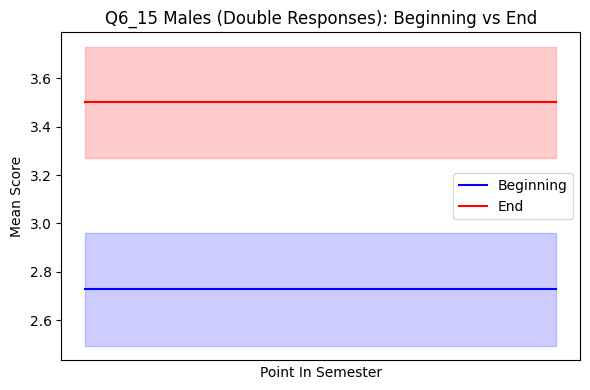

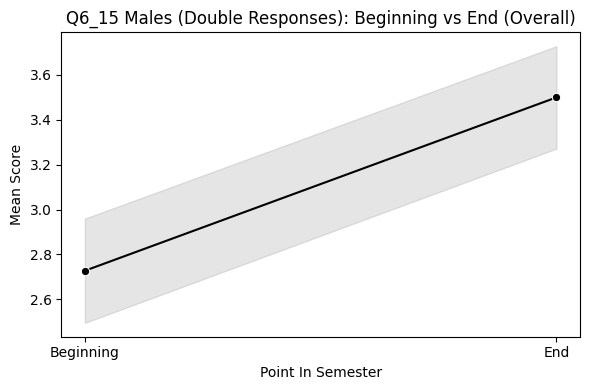

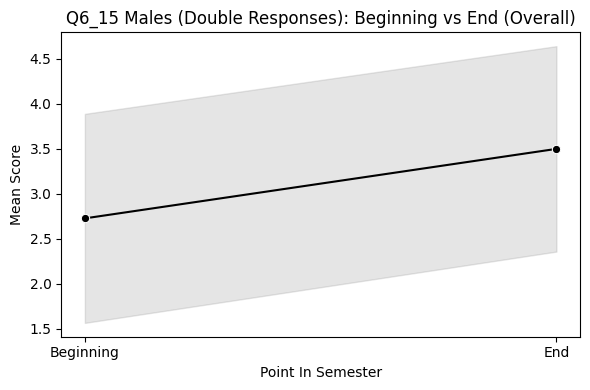

In [ ]:
# Q6_15: calculates and graphs standard deviation and average for males
male_beginning_Q6_15 = male_beginning_Q6_15.tolist()
male_end_Q6_15 = male_end_Q6_15.tolist()

Q6_15_MalelBEGAvg   = average_list(male_beginning_Q6_15)
Q6_15_MaleENDAvg   = average_list(male_end_Q6_15)

Q6_15_MaleBEGSTD = np.std(male_beginning_Q6_15)
Q6_15_MaleENDSTD = np.std(male_end_Q6_15)

print(f"Q6_15: Beginning Avg: {Q6_15_MalelBEGAvg}")
print(f"Q6_15 End Average: {Q6_15_MaleENDAvg}")
print(Q6_15_MaleBEGSTD)
print(Q6_15_MaleENDSTD)

lineplot_overall_separate("Q6_15 Males (Double Responses)",
    begOverall=male_beginning_Q6_15,
    endOverall=male_end_Q6_15, band_factor=0.20
)

lineplot_beg_to_end("Q6_15 Males (Double Responses)",
    begOverall=male_beginning_Q6_15,
    endOverall=male_end_Q6_15, band_factor=0.2)

lineplot_beg_to_end("Q6_15 Males (Double Responses)",
    begOverall=male_beginning_Q6_15,
    endOverall=male_end_Q6_15)

In [ ]:
# START OF QUESTION 5

In [ ]:
# overall Q5_1 Test Beginning vs End
begQ5_1overallALL = data[data["B/E?"] == "Beginning"]["Q5_1"].dropna()

endQ5_1overallALL = data[data["B/E?"] == "End"]["Q5_1"].dropna()

UTest(begQ5_1overallALL, endQ5_1overallALL)

Mann-Whitney U-Value: 779.5
P-value: 0.6798320323544998
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_1
# mean for Q5_1
Q5_1_result = data.groupby(["Gender", "B/E?"])["Q5_1"].mean()
print("Q5_1 Mean")
print(Q5_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
male_beginning_Q5_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()

female_end_Q5_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_1"].dropna()
male_end_Q5_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_1"].dropna()

# Q5_1: U-Test comparing genders in the beginning
print("Q5_1 Genders in the Beginning:")
UTest(female_beginning_Q5_1, male_beginning_Q5_1)

# Q5_1: U-Test comparing genders in the end
print()
print("Q5_1 Genders in the End:")
UTest(female_end_Q5_1, male_end_Q5_1)

# Q5_1 U-Test comparing females in the beginning vs end
print()
print("Q5_1 Females:")
UTest(female_beginning_Q5_1, female_end_Q5_1)

# Q5_1 U-Test comparing males in the beginning vs end
print()
print("Q5_1 Males:")
UTest(male_beginning_Q5_1, male_end_Q5_1)

Q5_1 Mean
Gender  B/E?     
Female  Beginning    4.285714
        End          4.555556
Male    Beginning    4.428571
        End          4.350000
Other   End          5.000000
Name: Q5_1, dtype: float64 

Q5_1 Genders in the Beginning:
Mann-Whitney U-Value: 207.0
P-value: 0.716454711380405
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Genders in the End:
Mann-Whitney U-Value: 205.5
P-value: 0.41107078559577803
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Females:
Mann-Whitney U-Value: 163.0
P-value: 0.4191836432038857
Fail to reject the null hypothesis: No significant differences exists

Q5_1 Males:
Mann-Whitney U-Value: 223.5
P-value: 0.7057200318492265
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_2 Test Beginning vs End
begQ5_2overallALL = data[data["B/E?"] == "Beginning"]["Q5_2"].dropna()

endQ5_2overallALL = data[data["B/E?"] == "End"]["Q5_2"].dropna()

UTest(begQ5_2overallALL, endQ5_2overallALL)

Mann-Whitney U-Value: 764.5
P-value: 0.5751901945163053
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_2
# mean for Q5_2
Q5_2_result = data.groupby(["Gender", "B/E?"])["Q5_2"].mean()
print("Q5_2 Mean")
print(Q5_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
male_beginning_Q5_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()

female_end_Q5_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_2"].dropna()
male_end_Q5_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_2"].dropna()

# Q5_2: U-Test comparing genders in the beginning
print("Q5_2 Genders in the Beginning:")
UTest(female_beginning_Q5_2, male_beginning_Q5_2)

# Q5_2: U-Test comparing genders in the end
print()
print("Q5_2 Genders in the End:")
UTest(female_end_Q5_2, male_end_Q5_2)

# Q5_2 U-Test comparing females in the beginning vs end
print()
print("Q5_2 Females:")
UTest(female_beginning_Q5_2, female_end_Q5_2)

# Q5_2 U-Test comparing males in the beginning vs end
print()
print("Q5_2 Males:")
UTest(male_beginning_Q5_2, male_end_Q5_2)

Q5_2 Mean
Gender  B/E?     
Female  Beginning    4.380952
        End          4.388889
Male    Beginning    4.190476
        End          4.350000
Other   End          4.000000
Name: Q5_2, dtype: float64 

Q5_2 Genders in the Beginning:
Mann-Whitney U-Value: 267.0
P-value: 0.19819290246795873
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Genders in the End:
Mann-Whitney U-Value: 180.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Females:
Mann-Whitney U-Value: 193.5
P-value: 0.9002546496902224
Fail to reject the null hypothesis: No significant differences exists

Q5_2 Males:
Mann-Whitney U-Value: 175.5
P-value: 0.33368188143065025
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_3 Test Beginning vs End
begQ5_3overallALL = data[data["B/E?"] == "Beginning"]["Q5_3"].dropna()

endQ5_3overallALL = data[data["B/E?"] == "End"]["Q5_3"].dropna()

UTest(begQ5_3overallALL, endQ5_3overallALL)

Mann-Whitney U-Value: 772.5
P-value: 0.6317316806248137
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_3
# mean for Q5_3
Q5_3_result = data.groupby(["Gender", "B/E?"])["Q5_3"].mean()
print("Q5_3 Mean")
print(Q5_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
male_beginning_Q5_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()

female_end_Q5_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_3"].dropna()
male_end_Q5_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_3"].dropna()

# Q5_3: U-Test comparing genders in the beginning
print("Q5_3 Genders in the Beginning:")
UTest(female_beginning_Q5_3, male_beginning_Q5_3)

# Q5_3: U-Test comparing genders in the end
print()
print("Q5_3 Genders in the End:")
UTest(female_end_Q5_3, male_end_Q5_3)

# Q5_3 U-Test comparing females in the beginning vs end
print()
print("Q5_3 Females:")
UTest(female_beginning_Q5_3, female_end_Q5_3)

# Q5_3 U-Test comparing males in the beginning vs end
print()
print("Q5_3 Males:")
UTest(male_beginning_Q5_3, male_end_Q5_3)

Q5_3 Mean
Gender  B/E?     
Female  Beginning    4.333333
        End          4.444444
Male    Beginning    4.238095
        End          4.350000
Other   End          4.000000
Name: Q5_3, dtype: float64 

Q5_3 Genders in the Beginning:
Mann-Whitney U-Value: 231.0
P-value: 0.7805040787047589
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Genders in the End:
Mann-Whitney U-Value: 188.0
P-value: 0.8067683951430975
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Females:
Mann-Whitney U-Value: 176.0
P-value: 0.6952898950369168
Fail to reject the null hypothesis: No significant differences exists

Q5_3 Males:
Mann-Whitney U-Value: 195.5
P-value: 0.6893462524664659
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_4 Test Beginning vs End
begQ5_4overallALL = data[data["B/E?"] == "Beginning"]["Q5_4"].dropna()

endQ5_4overallALL = data[data["B/E?"] == "End"]["Q5_4"].dropna()

UTest(begQ5_4overallALL, endQ5_4overallALL)

Mann-Whitney U-Value: 762.5
P-value: 0.5536532243550438
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_4
# mean for Q5_4
Q5_4_result = data.groupby(["Gender", "B/E?"])["Q5_4"].mean()
print("Q5_4 Mean")
print(Q5_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
male_beginning_Q5_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()

female_end_Q5_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_4"].dropna()
male_end_Q5_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_4"].dropna()

# Q5_4: U-Test comparing genders in the beginning
print("Q5_4 Genders in the Beginning:")
UTest(female_beginning_Q5_4, male_beginning_Q5_4)

# Q5_4: U-Test comparing genders in the end
print()
print("Q5_4 Genders in the End:")
UTest(female_end_Q5_4, male_end_Q5_4)

# Q5_4 U-Test comparing females in the beginning vs end
print()
print("Q5_4 Females:")
UTest(female_beginning_Q5_4, female_end_Q5_4)

# Q5_4 U-Test comparing males in the beginning vs end
print()
print("Q5_4 Males:")
UTest(male_beginning_Q5_4, male_end_Q5_4)

Q5_4 Mean
Gender  B/E?     
Female  Beginning    4.285714
        End          4.500000
Male    Beginning    4.428571
        End          4.450000
Other   End          5.000000
Name: Q5_4, dtype: float64 

Q5_4 Genders in the Beginning:
Mann-Whitney U-Value: 213.5
P-value: 0.8566453724109204
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Genders in the End:
Mann-Whitney U-Value: 189.0
P-value: 0.7784198196259047
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Females:
Mann-Whitney U-Value: 171.5
P-value: 0.5937831024099688
Fail to reject the null hypothesis: No significant differences exists

Q5_4 Males:
Mann-Whitney U-Value: 205.5
P-value: 0.9062500511436348
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_5 Test Beginning vs End
begQ5_5overallALL = data[data["B/E?"] == "Beginning"]["Q5_5"].dropna()

endQ5_5overallALL = data[data["B/E?"] == "End"]["Q5_5"].dropna()

UTest(begQ5_5overallALL, endQ5_5overallALL)

Mann-Whitney U-Value: 774.5
P-value: 0.6171548969231819
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_5
# mean for Q5_5
Q5_5_result = data.groupby(["Gender", "B/E?"])["Q5_5"].mean()
print("Q5_5 Mean")
print(Q5_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
male_beginning_Q5_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()

female_end_Q5_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_5"].dropna()
male_end_Q5_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_5"].dropna()

# Q5_5: U-Test comparing genders in the beginning
print("Q5_5 Genders in the Beginning:")
UTest(female_beginning_Q5_5, male_beginning_Q5_5)

# Q5_5: U-Test comparing genders in the end
print()
print("Q5_5 Genders in the End:")
UTest(female_end_Q5_5, male_end_Q5_5)

# Q5_5 U-Test comparing females in the beginning vs end
print()
print("Q5_5 Females:")
UTest(female_beginning_Q5_5, female_end_Q5_5)

# Q5_5 U-Test comparing males in the beginning vs end
print()
print("Q5_5 Males:")
UTest(male_beginning_Q5_5, male_end_Q5_5)

Q5_5 Mean
Gender  B/E?     
Female  Beginning    4.571429
        End          4.666667
Male    Beginning    4.380952
        End          4.500000
Other   End          5.000000
Name: Q5_5, dtype: float64 

Q5_5 Genders in the Beginning:
Mann-Whitney U-Value: 251.5
P-value: 0.3661381011942699
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Genders in the End:
Mann-Whitney U-Value: 208.0
P-value: 0.3258749361375052
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Females:
Mann-Whitney U-Value: 178.0
P-value: 0.6989738054204909
Fail to reject the null hypothesis: No significant differences exists

Q5_5 Males:
Mann-Whitney U-Value: 200.0
P-value: 0.7782010295684803
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_6 Test Beginning vs End
begQ5_6overallALL = data[data["B/E?"] == "Beginning"]["Q5_6"].dropna()

endQ5_6overallALL = data[data["B/E?"] == "End"]["Q5_6"].dropna()

UTest(begQ5_6overallALL, endQ5_6overallALL)

Mann-Whitney U-Value: 750.5
P-value: 0.4851226505789398
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_6
# mean for Q5_6
Q5_6_result = data.groupby(["Gender", "B/E?"])["Q5_6"].mean()
print("Q5_6 Mean")
print(Q5_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
male_beginning_Q5_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()

female_end_Q5_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_6"].dropna()
male_end_Q5_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_6"].dropna()

# Q5_6: U-Test comparing genders in the beginning
print("Q5_6 Genders in the Beginning:")
UTest(female_beginning_Q5_6, male_beginning_Q5_6)

# Q5_6: U-Test comparing genders in the end
print()
print("Q5_6 Genders in the End:")
UTest(female_end_Q5_6, male_end_Q5_6)

# Q5_6 U-Test comparing females in the beginning vs end
print()
print("Q5_6 Females:")
UTest(female_beginning_Q5_6, female_end_Q5_6)

# Q5_6 U-Test comparing males in the beginning vs end
print()
print("Q5_6 Males:")
UTest(male_beginning_Q5_6, male_end_Q5_6)

Q5_6 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.055556
Male    Beginning    4.190476
        End          4.350000
Other   End          5.000000
Name: Q5_6, dtype: float64 

Q5_6 Genders in the Beginning:
Mann-Whitney U-Value: 187.5
P-value: 0.3681504553701289
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Genders in the End:
Mann-Whitney U-Value: 139.5
P-value: 0.20682756940350533
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Females:
Mann-Whitney U-Value: 185.5
P-value: 0.9257195626464382
Fail to reject the null hypothesis: No significant differences exists

Q5_6 Males:
Mann-Whitney U-Value: 188.0
P-value: 0.5413075756852839
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_7 Test Beginning vs End
begQ5_7overallALL = data[data["B/E?"] == "Beginning"]["Q5_7"].dropna()

endQ5_7overallALL = data[data["B/E?"] == "End"]["Q5_7"].dropna()

UTest(begQ5_7overallALL, endQ5_7overallALL)

Mann-Whitney U-Value: 749.5
P-value: 0.4579632765720941
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_7
# mean for Q5_7
Q5_7_result = data.groupby(["Gender", "B/E?"])["Q5_7"].mean()
print("Q5_7 Mean")
print(Q5_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
male_beginning_Q5_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()

female_end_Q5_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_7"].dropna()
male_end_Q5_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_7"].dropna()

# Q5_7: U-Test comparing genders in the beginning
print("Q5_7 Genders in the Beginning:")
UTest(female_beginning_Q5_7, male_beginning_Q5_7)

# Q5_7: U-Test comparing genders in the end
print()
print("Q5_7 Genders in the End:")
UTest(female_end_Q5_7, male_end_Q5_7)

# Q5_7 U-Test comparing females in the beginning vs end
print()
print("Q5_7 Females:")
UTest(female_beginning_Q5_7, female_end_Q5_7)

# Q5_7 U-Test comparing males in the beginning vs end
print()
print("Q5_7 Males:")
UTest(male_beginning_Q5_7, male_end_Q5_7)

Q5_7 Mean
Gender  B/E?     
Female  Beginning    4.333333
        End          4.555556
Male    Beginning    4.523810
        End          4.550000
Other   End          4.000000
Name: Q5_7, dtype: float64 

Q5_7 Genders in the Beginning:
Mann-Whitney U-Value: 200.0
P-value: 0.5696059614245108
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Genders in the End:
Mann-Whitney U-Value: 181.5
P-value: 0.972863062883514
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Females:
Mann-Whitney U-Value: 161.5
P-value: 0.39132027601630603
Fail to reject the null hypothesis: No significant differences exists

Q5_7 Males:
Mann-Whitney U-Value: 199.0
P-value: 0.7522467127813478
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_8 Test Beginning vs End
begQ5_8overallALL = data[data["B/E?"] == "Beginning"]["Q5_8"].dropna()

endQ5_8overallALL = data[data["B/E?"] == "End"]["Q5_8"].dropna()

UTest(begQ5_8overallALL, endQ5_8overallALL)

Mann-Whitney U-Value: 775.0
P-value: 0.6491090813979374
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_8
# mean for Q5_8
Q5_8_result = data.groupby(["Gender", "B/E?"])["Q5_8"].mean()
print("Q5_8 Mean")
print(Q5_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
male_beginning_Q5_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()

female_end_Q5_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_8"].dropna()
male_end_Q5_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_8"].dropna()

# Q5_8: U-Test comparing genders in the beginning
print("Q5_8 Genders in the Beginning:")
UTest(female_beginning_Q5_8, male_beginning_Q5_8)

# Q5_8: U-Test comparing genders in the end
print()
print("Q5_8 Genders in the End:")
UTest(female_end_Q5_8, male_end_Q5_8)

# Q5_8 U-Test comparing females in the beginning vs end
print()
print("Q5_8 Females:")
UTest(female_beginning_Q5_8, female_end_Q5_8)

# Q5_8 U-Test comparing males in the beginning vs end
print()
print("Q5_8 Males:")
UTest(male_beginning_Q5_8, male_end_Q5_8)

Q5_8 Mean
Gender  B/E?     
Female  Beginning    4.238095
        End          4.333333
Male    Beginning    4.333333
        End          4.400000
Other   End          5.000000
Name: Q5_8, dtype: float64 

Q5_8 Genders in the Beginning:
Mann-Whitney U-Value: 209.5
P-value: 0.7696422249950875
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Genders in the End:
Mann-Whitney U-Value: 170.0
P-value: 0.7588483014905298
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Females:
Mann-Whitney U-Value: 182.0
P-value: 0.8410602089866728
Fail to reject the null hypothesis: No significant differences exists

Q5_8 Males:
Mann-Whitney U-Value: 201.0
P-value: 0.8043952661322697
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_9 Test Beginning vs End
begQ5_9overallALL = data[data["B/E?"] == "Beginning"]["Q5_9"].dropna()

endQ5_9overallALL = data[data["B/E?"] == "End"]["Q5_9"].dropna()

UTest(begQ5_9overallALL, endQ5_9overallALL)

Mann-Whitney U-Value: 731.0
P-value: 0.4421674405803192
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_9
# mean for Q5_9
Q5_9_result = data.groupby(["Gender", "B/E?"])["Q5_9"].mean()
print("Q5_9 Mean")
print(Q5_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
male_beginning_Q5_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()

female_end_Q5_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_9"].dropna()
male_end_Q5_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_9"].dropna()

# Q5_9: U-Test comparing genders in the beginning
print("Q5_9 Genders in the Beginning:")
UTest(female_beginning_Q5_9, male_beginning_Q5_9)

# Q5_9: U-Test comparing genders in the end
print()
print("Q5_9 Genders in the End:")
UTest(female_end_Q5_9, male_end_Q5_9)

# Q5_9 U-Test comparing females in the beginning vs end
print()
print("Q5_9 Females:")
UTest(female_beginning_Q5_9, female_end_Q5_9)

# Q5_9 U-Test comparing males in the beginning vs end
print()
print("Q5_9 Males:")
UTest(male_beginning_Q5_9, male_end_Q5_9)

Q5_9 Mean
Gender  B/E?     
Female  Beginning    4.523810
        End          4.722222
Male    Beginning    4.450000
        End          4.500000
Other   End          5.000000
Name: Q5_9, dtype: float64 

Q5_9 Genders in the Beginning:
Mann-Whitney U-Value: 238.0
P-value: 0.4106294315085057
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Genders in the End:
Mann-Whitney U-Value: 218.5
P-value: 0.1815052995318308
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Females:
Mann-Whitney U-Value: 167.0
P-value: 0.4423286472571015
Fail to reject the null hypothesis: No significant differences exists

Q5_9 Males:
Mann-Whitney U-Value: 190.5
P-value: 0.7826636183353667
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_10 Test Beginning vs End
begQ5_10overallALL = data[data["B/E?"] == "Beginning"]["Q5_10"].dropna()

endQ5_10overallALL = data[data["B/E?"] == "End"]["Q5_10"].dropna()

UTest(begQ5_10overallALL, endQ5_10overallALL)

Mann-Whitney U-Value: 744.0
P-value: 0.44718434062404855
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_10
# mean for Q5_10
Q5_10_result = data.groupby(["Gender", "B/E?"])["Q5_10"].mean()
print("Q5_10 Mean")
print(Q5_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
male_beginning_Q5_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()

female_end_Q5_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_10"].dropna()
male_end_Q5_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_10"].dropna()

# Q5_10: U-Test comparing genders in the beginning
print("Q5_10 Genders in the Beginning:")
UTest(female_beginning_Q5_10, male_beginning_Q5_10)

# Q5_10: U-Test comparing genders in the end
print()
print("Q5_10 Genders in the End:")
UTest(female_end_Q5_10, male_end_Q5_10)

# Q5_10 U-Test comparing females in the beginning vs end
print()
print("Q5_10 Females:")
UTest(female_beginning_Q5_10, female_end_Q5_10)

# Q5_10 U-Test comparing males in the beginning vs end
print()
print("Q5_10 Males:")
UTest(male_beginning_Q5_10, male_end_Q5_10)

Q5_10 Mean
Gender  B/E?     
Female  Beginning    3.952381
        End          4.166667
Male    Beginning    4.190476
        End          4.300000
Other   End          4.000000
Name: Q5_10, dtype: float64 

Q5_10 Genders in the Beginning:
Mann-Whitney U-Value: 187.5
P-value: 0.38390413204955853
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Genders in the End:
Mann-Whitney U-Value: 150.5
P-value: 0.3525211365205908
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Females:
Mann-Whitney U-Value: 167.0
P-value: 0.5147597118201518
Fail to reject the null hypothesis: No significant differences exists

Q5_10 Males:
Mann-Whitney U-Value: 189.5
P-value: 0.5700646764548545
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_11 Test Beginning vs End
begQ5_11overallALL = data[data["B/E?"] == "Beginning"]["Q5_11"].dropna()

endQ5_11overallALL = data[data["B/E?"] == "End"]["Q5_11"].dropna()

UTest(begQ5_11overallALL, endQ5_11overallALL)

Mann-Whitney U-Value: 728.5
P-value: 0.35256712520862665
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_11
# mean for Q5_11
Q5_11_result = data.groupby(["Gender", "B/E?"])["Q5_11"].mean()
print("Q5_11 Mean")
print(Q5_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
male_beginning_Q5_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()

female_end_Q5_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_11"].dropna()
male_end_Q5_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_11"].dropna()

# Q5_11: U-Test comparing genders in the beginning
print("Q5_11 Genders in the Beginning:")
UTest(female_beginning_Q5_11, male_beginning_Q5_11)

# Q5_11: U-Test comparing genders in the end
print()
print("Q5_11 Genders in the End:")
UTest(female_end_Q5_11, male_end_Q5_11)

# Q5_11 U-Test comparing females in the beginning vs end
print()
print("Q5_11 Females:")
UTest(female_beginning_Q5_11, female_end_Q5_11)

# Q5_11 U-Test comparing males in the beginning vs end
print()
print("Q5_11 Males:")
UTest(male_beginning_Q5_11, male_end_Q5_11)

Q5_11 Mean
Gender  B/E?     
Female  Beginning    4.047619
        End          4.388889
Male    Beginning    4.333333
        End          4.300000
Other   End          5.000000
Name: Q5_11, dtype: float64 

Q5_11 Genders in the Beginning:
Mann-Whitney U-Value: 186.0
P-value: 0.35727672858929815
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Genders in the End:
Mann-Whitney U-Value: 184.0
P-value: 0.9091779876982148
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Females:
Mann-Whitney U-Value: 153.0
P-value: 0.28050556504967017
Fail to reject the null hypothesis: No significant differences exists

Q5_11 Males:
Mann-Whitney U-Value: 207.5
P-value: 0.9539488225790647
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_12 Test Beginning vs End
begQ5_12overallALL = data[data["B/E?"] == "Beginning"]["Q5_12"].dropna()

endQ5_12overallALL = data[data["B/E?"] == "End"]["Q5_12"].dropna()

UTest(begQ5_12overallALL, endQ5_12overallALL)

Mann-Whitney U-Value: 753.0
P-value: 0.49107530156379187
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_12
# mean for Q5_12
Q5_12_result = data.groupby(["Gender", "B/E?"])["Q5_12"].mean()
print("Q5_12 Mean")
print(Q5_12_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
male_beginning_Q5_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()

female_end_Q5_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_12"].dropna()
male_end_Q5_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_12"].dropna()

# Q5_12: U-Test comparing genders in the beginning
print("Q5_12 Genders in the Beginning:")
UTest(female_beginning_Q5_12, male_beginning_Q5_12)

# Q5_12: U-Test comparing genders in the end
print()
print("Q5_12 Genders in the End:")
UTest(female_end_Q5_12, male_end_Q5_12)

# Q5_12 U-Test comparing females in the beginning vs end
print()
print("Q5_12 Females:")
UTest(female_beginning_Q5_12, female_end_Q5_12)

# Q5_12 U-Test comparing males in the beginning vs end
print()
print("Q5_12 Males:")
UTest(male_beginning_Q5_12, male_end_Q5_12)

Q5_12 Mean
Gender  B/E?     
Female  Beginning    4.238095
        End          4.444444
Male    Beginning    4.380952
        End          4.450000
Other   End          5.000000
Name: Q5_12, dtype: float64 

Q5_12 Genders in the Beginning:
Mann-Whitney U-Value: 197.0
P-value: 0.5243029179003666
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Genders in the End:
Mann-Whitney U-Value: 175.5
P-value: 0.8955063044214417
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Females:
Mann-Whitney U-Value: 167.5
P-value: 0.5132731830986341
Fail to reject the null hypothesis: No significant differences exists

Q5_12 Males:
Mann-Whitney U-Value: 204.5
P-value: 0.8838317675224825
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q5_13 Test Beginning vs End
begQ5_13overallALL = data[data["B/E?"] == "Beginning"]["Q5_13"].dropna()

endQ5_13overallALL = data[data["B/E?"] == "End"]["Q5_13"].dropna()

UTest(begQ5_13overallALL, endQ5_13overallALL)

Mann-Whitney U-Value: 701.0
P-value: 0.21953092875046576
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q5_13
# mean for Q5_13
Q5_13_result = data.groupby(["Gender", "B/E?"])["Q5_13"].mean()
print("Q5_13 Mean")
print(Q5_13_result, "\n")

# creates dataframes for each gender
female_beginning_Q5_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
male_beginning_Q5_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()

female_end_Q5_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q5_13"].dropna()
male_end_Q5_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q5_13"].dropna()

# Q5_13: U-Test comparing genders in the beginning
print("Q5_13 Genders in the Beginning:")
UTest(female_beginning_Q5_13, male_beginning_Q5_13)

# Q5_13: U-Test comparing genders in the end
print()
print("Q5_13 Genders in the End:")
UTest(female_end_Q5_13, male_end_Q5_13)

# Q5_13 U-Test comparing females in the beginning vs end
print()
print("Q5_13 Females:")
UTest(female_beginning_Q5_13, female_end_Q5_13)

# Q5_13 U-Test comparing males in the beginning vs end
print()
print("Q5_13 Males:")
UTest(male_beginning_Q5_13, male_end_Q5_13)

Q5_13 Mean
Gender  B/E?     
Female  Beginning    4.047619
        End          4.500000
Male    Beginning    4.476190
        End          4.450000
Other   End          5.000000
Name: Q5_13, dtype: float64 

Q5_13 Genders in the Beginning:
Mann-Whitney U-Value: 158.5
P-value: 0.09327884306973379
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Genders in the End:
Mann-Whitney U-Value: 184.5
P-value: 0.8947452125641843
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Females:
Mann-Whitney U-Value: 133.5
P-value: 0.09217658055572417
Fail to reject the null hypothesis: No significant differences exists

Q5_13 Males:
Mann-Whitney U-Value: 214.5
P-value: 0.9061566877651879
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 4

In [ ]:
# overall Q4_1 Test Beginning vs End
begQ4_1overallALL = data[data["B/E?"] == "Beginning"]["Q4_1"].dropna()

endQ4_1overallALL = data[data["B/E?"] == "End"]["Q4_1"].dropna()

UTest(begQ4_1overallALL, endQ4_1overallALL)

Mann-Whitney U-Value: 817.0
P-value: 0.5394334899631197
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_1
# mean for Q4_1
Q4_1_result = data.groupby(["Gender", "B/E?"])["Q4_1"].mean()
print("Q4_1 Mean")
print(Q4_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
male_beginning_Q4_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()

female_end_Q4_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_1"].dropna()
male_end_Q4_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_1"].dropna()

# Q4_1: U-Test comparing genders in the beginning
print("Q4_1 Genders in the Beginning:")
UTest(female_beginning_Q4_1, male_beginning_Q4_1)

# Q4_1: U-Test comparing genders in the end
print()
print("Q4_1 Genders in the End:")
UTest(female_end_Q4_1, male_end_Q4_1)

# Q4_1 U-Test comparing females in the beginning vs end
print()
print("Q4_1 Females:")
UTest(female_beginning_Q4_1, female_end_Q4_1)

# Q4_1 U-Test comparing males in the beginning vs end
print()
print("Q4_1 Males:")
UTest(male_beginning_Q4_1, male_end_Q4_1)

Q4_1 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          3.875000
Male    Beginning    4.000000
        End          4.120000
Other   End          5.000000
Name: Q4_1, dtype: float64 

Q4_1 Genders in the Beginning:
Mann-Whitney U-Value: 187.0
P-value: 0.4401329493983126
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Genders in the End:
Mann-Whitney U-Value: 166.0
P-value: 0.34100608358285756
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Females:
Mann-Whitney U-Value: 140.0
P-value: 0.8973335442659744
Fail to reject the null hypothesis: No significant differences exists

Q4_1 Males:
Mann-Whitney U-Value: 279.5
P-value: 0.6690200119935482
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_2 Test Beginning vs End
begQ4_2overallALL = data[data["B/E?"] == "Beginning"]["Q4_2"].dropna()

endQ4_2overallALL = data[data["B/E?"] == "End"]["Q4_2"].dropna()

UTest(begQ4_2overallALL, endQ4_2overallALL)

Mann-Whitney U-Value: 888.5
P-value: 0.9548321414695154
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_2
# mean for Q4_2
Q4_2_result = data.groupby(["Gender", "B/E?"])["Q4_2"].mean()
print("Q4_2 Mean")
print(Q4_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
male_beginning_Q4_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()

female_end_Q4_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_2"].dropna()
male_end_Q4_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_2"].dropna()

# Q4_2: U-Test comparing genders in the beginning
print("Q4_2 Genders in the Beginning:")
UTest(female_beginning_Q4_2, male_beginning_Q4_2)

# Q4_2: U-Test comparing genders in the end
print()
print("Q4_2 Genders in the End:")
UTest(female_end_Q4_2, male_end_Q4_2)

# Q4_2 U-Test comparing females in the beginning vs end
print()
print("Q4_2 Females:")
UTest(female_beginning_Q4_2, female_end_Q4_2)

# Q4_2 U-Test comparing males in the beginning vs end
print()
print("Q4_2 Males:")
UTest(male_beginning_Q4_2, male_end_Q4_2)

Q4_2 Mean
Gender  B/E?     
Female  Beginning    3.777778
        End          3.562500
Male    Beginning    3.916667
        End          4.000000
Other   End          4.000000
Name: Q4_2, dtype: float64 

Q4_2 Genders in the Beginning:
Mann-Whitney U-Value: 185.5
P-value: 0.41595434793586095
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Genders in the End:
Mann-Whitney U-Value: 158.0
P-value: 0.24635731737042865
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Females:
Mann-Whitney U-Value: 154.5
P-value: 0.7144451782290201
Fail to reject the null hypothesis: No significant differences exists

Q4_2 Males:
Mann-Whitney U-Value: 295.5
P-value: 0.9326129436611549
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_3 Test Beginning vs End
begQ4_3overallALL = data[data["B/E?"] == "Beginning"]["Q4_3"].dropna()

endQ4_3overallALL = data[data["B/E?"] == "End"]["Q4_3"].dropna()

UTest(begQ4_3overallALL, endQ4_3overallALL)

Mann-Whitney U-Value: 785.0
P-value: 0.36075979094324573
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_3
# mean for Q4_3
Q4_3_result = data.groupby(["Gender", "B/E?"])["Q4_3"].mean()
print("Q4_3 Mean")
print(Q4_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
male_beginning_Q4_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()

female_end_Q4_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_3"].dropna()
male_end_Q4_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_3"].dropna()

# Q4_3: U-Test comparing genders in the beginning
print("Q4_3 Genders in the Beginning:")
UTest(female_beginning_Q4_3, male_beginning_Q4_3)

# Q4_3: U-Test comparing genders in the end
print()
print("Q4_3 Genders in the End:")
UTest(female_end_Q4_3, male_end_Q4_3)

# Q4_3 U-Test comparing females in the beginning vs end
print()
print("Q4_3 Females:")
UTest(female_beginning_Q4_3, female_end_Q4_3)

# Q4_3 U-Test comparing males in the beginning vs end
print()
print("Q4_3 Males:")
UTest(male_beginning_Q4_3, male_end_Q4_3)

Q4_3 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          4.062500
Male    Beginning    4.000000
        End          4.080000
Other   End          5.000000
Name: Q4_3, dtype: float64 

Q4_3 Genders in the Beginning:
Mann-Whitney U-Value: 190.0
P-value: 0.4937177188278644
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Genders in the End:
Mann-Whitney U-Value: 193.5
P-value: 0.8641810324765065
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Females:
Mann-Whitney U-Value: 120.5
P-value: 0.39718460172507186
Fail to reject the null hypothesis: No significant differences exists

Q4_3 Males:
Mann-Whitney U-Value: 286.5
P-value: 0.7833636617022965
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_4 Test Beginning vs End
begQ4_4overallALL = data[data["B/E?"] == "Beginning"]["Q4_4"].dropna()

endQ4_4overallALL = data[data["B/E?"] == "End"]["Q4_4"].dropna()

UTest(begQ4_4overallALL, endQ4_4overallALL)

Mann-Whitney U-Value: 782.5
P-value: 0.3463371242931349
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_4
# mean for Q4_4
Q4_4_result = data.groupby(["Gender", "B/E?"])["Q4_4"].mean()
print("Q4_4 Mean")
print(Q4_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
male_beginning_Q4_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()

female_end_Q4_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_4"].dropna()
male_end_Q4_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_4"].dropna()

# Q4_4: U-Test comparing genders in the beginning
print("Q4_4 Genders in the Beginning:")
UTest(female_beginning_Q4_4, male_beginning_Q4_4)

# Q4_4: U-Test comparing genders in the end
print()
print("Q4_4 Genders in the End:")
UTest(female_end_Q4_4, male_end_Q4_4)

# Q4_4 U-Test comparing females in the beginning vs end
print()
print("Q4_4 Females:")
UTest(female_beginning_Q4_4, female_end_Q4_4)

# Q4_4 U-Test comparing males in the beginning vs end
print()
print("Q4_4 Males:")
UTest(male_beginning_Q4_4, male_end_Q4_4)

Q4_4 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          4.062500
Male    Beginning    4.083333
        End          4.120000
Other   End          5.000000
Name: Q4_4, dtype: float64 

Q4_4 Genders in the Beginning:
Mann-Whitney U-Value: 176.5
P-value: 0.2869710305163421
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Genders in the End:
Mann-Whitney U-Value: 196.5
P-value: 0.9321468725078159
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Females:
Mann-Whitney U-Value: 118.5
P-value: 0.3616080868568812
Fail to reject the null hypothesis: No significant differences exists

Q4_4 Males:
Mann-Whitney U-Value: 289.5
P-value: 0.8307834454758128
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_5 Test Beginning vs End
begQ4_5overallALL = data[data["B/E?"] == "Beginning"]["Q4_5"].dropna()

endQ4_5overallALL = data[data["B/E?"] == "End"]["Q4_5"].dropna()

UTest(begQ4_5overallALL, endQ4_5overallALL)

Mann-Whitney U-Value: 741.0
P-value: 0.17625974512310782
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_5
# mean for Q4_5
Q4_5_result = data.groupby(["Gender", "B/E?"])["Q4_5"].mean()
print("Q4_5 Mean")
print(Q4_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
male_beginning_Q4_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()

female_end_Q4_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_5"].dropna()
male_end_Q4_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_5"].dropna()

# Q4_5: U-Test comparing genders in the beginning
print("Q4_5 Genders in the Beginning:")
UTest(female_beginning_Q4_5, male_beginning_Q4_5)

# Q4_5: U-Test comparing genders in the end
print()
print("Q4_5 Genders in the End:")
UTest(female_end_Q4_5, male_end_Q4_5)

# Q4_5 U-Test comparing females in the beginning vs end
print()
print("Q4_5 Females:")
UTest(female_beginning_Q4_5, female_end_Q4_5)

# Q4_5 U-Test comparing males in the beginning vs end
print()
print("Q4_5 Males:")
UTest(male_beginning_Q4_5, male_end_Q4_5)

Q4_5 Mean
Gender  B/E?     
Female  Beginning    4.055556
        End          4.125000
Male    Beginning    3.791667
        End          4.120000
Other   End          5.000000
Name: Q4_5, dtype: float64 

Q4_5 Genders in the Beginning:
Mann-Whitney U-Value: 247.5
P-value: 0.3880954599494094
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Genders in the End:
Mann-Whitney U-Value: 206.0
P-value: 0.8749778655200426
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Females:
Mann-Whitney U-Value: 131.5
P-value: 0.6547208460185769
Fail to reject the null hypothesis: No significant differences exists

Q4_5 Males:
Mann-Whitney U-Value: 243.0
P-value: 0.22398947006842718
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_6 Test Beginning vs End
begQ4_6overallALL = data[data["B/E?"] == "Beginning"]["Q4_6"].dropna().tolist()

endQ4_6overallALL = data[data["B/E?"] == "End"]["Q4_6"].dropna().tolist()

UTest(begQ4_6overallALL, endQ4_6overallALL)

Mann-Whitney U-Value: 628.5
P-value: 0.016011497225657433
Reject the null hypothesis: Significant differences exists


Q4_6: Beginning Avg: 3.5952380952380953
Q4_6 End Average: 4.0476190476190474
0.8182304894018849
0.81510679850589


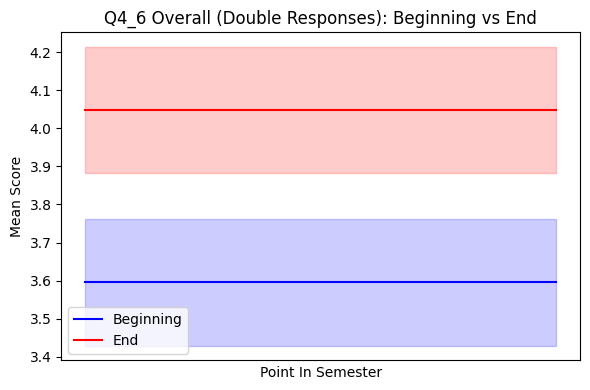

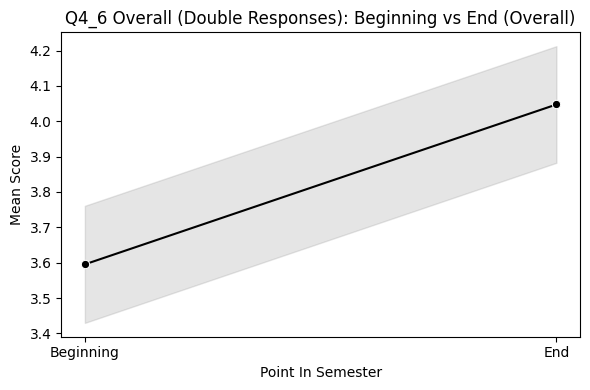

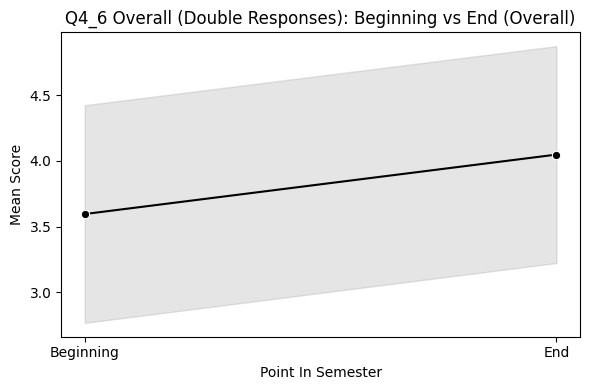

In [ ]:
# Q4_6: calculates and graphs overall average and standard deviation
Q4_6_OverallBEGAvg   = average_list(begQ4_6overallALL)
Q4_6_OverallENDAvg   = average_list(endQ4_6overallALL)

Q4_6_OverallBEGSTD = np.std(begQ4_6overallALL)
Q4_6_OverallENDSTD = np.std(endQ4_6overallALL)

print(f"Q4_6: Beginning Avg: {Q4_6_OverallBEGAvg}")
print(f"Q4_6 End Average: {Q4_6_OverallENDAvg}")
print(Q4_6_OverallBEGSTD)
print(Q4_6_OverallENDSTD)

lineplot_overall_separate("Q4_6 Overall (Double Responses)",
    begOverall=begQ4_6overallALL,
    endOverall=endQ4_6overallALL, band_factor=0.20
)

lineplot_beg_to_end("Q4_6 Overall (Double Responses)",
    begOverall=begQ4_6overallALL,
    endOverall=endQ4_6overallALL, band_factor=0.20
)

lineplot_beg_to_end("Q4_6 Overall (Double Responses)",
    begOverall=begQ4_6overallALL,
    endOverall=endQ4_6overallALL)


In [ ]:
# Q4_6
# mean for Q4_6
Q4_6_result = data.groupby(["Gender", "B/E?"])["Q4_6"].mean()
print("Q4_6 Mean")
print(Q4_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
male_beginning_Q4_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()

female_end_Q4_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_6"].dropna()
male_end_Q4_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_6"].dropna()

# Q4_6: U-Test comparing genders in the beginning
print("Q4_6 Genders in the Beginning:")
UTest(female_beginning_Q4_6, male_beginning_Q4_6)

# Q4_6: U-Test comparing genders in the end
print()
print("Q4_6 Genders in the End:")
UTest(female_end_Q4_6, male_end_Q4_6)

# Q4_6 U-Test comparing females in the beginning vs end
print()
print("Q4_6 Females:")
UTest(female_beginning_Q4_6, female_end_Q4_6)

# Q4_6 U-Test comparing males in the beginning vs end
print()
print("Q4_6 Males:")
UTest(male_beginning_Q4_6, male_end_Q4_6)

Q4_6 Mean
Gender  B/E?     
Female  Beginning    3.666667
        End          3.937500
Male    Beginning    3.541667
        End          4.080000
Other   End          5.000000
Name: Q4_6, dtype: float64 

Q4_6 Genders in the Beginning:
Mann-Whitney U-Value: 233.5
P-value: 0.6400504600001162
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Genders in the End:
Mann-Whitney U-Value: 176.5
P-value: 0.5129709815339994
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Females:
Mann-Whitney U-Value: 119.5
P-value: 0.37109336952269756
Fail to reject the null hypothesis: No significant differences exists

Q4_6 Males:
Mann-Whitney U-Value: 199.0
P-value: 0.03337451047841795
Reject the null hypothesis: Significant differences exists


In [ ]:
# overall Q4_7 Test Beginning vs End
begQ4_7overallALL = data[data["B/E?"] == "Beginning"]["Q4_7"].dropna()

endQ4_7overallALL = data[data["B/E?"] == "End"]["Q4_7"].dropna()

UTest(begQ4_7overallALL, endQ4_7overallALL)

Kruskal-Wallis H-Statistic: 0.39200463687245113
P-value: 0.5312475573239113
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_7
# mean for Q4_7
Q4_7_result = data.groupby(["Gender", "B/E?"])["Q4_7"].mean()
print("Q4_7 Mean")
print(Q4_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
male_beginning_Q4_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()

female_end_Q4_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_7"].dropna()
male_end_Q4_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_7"].dropna()

# Q4_7: U-Test comparing genders in the beginning
print("Q4_7 Genders in the Beginning:")
UTest(female_beginning_Q4_7, male_beginning_Q4_7)

# Q4_7: U-Test comparing genders in the end
print()
print("Q4_7 Genders in the End:")
UTest(female_end_Q4_7, male_end_Q4_7)

# Q4_7 U-Test comparing females in the beginning vs end
print()
print("Q4_7 Females:")
UTest(female_beginning_Q4_7, female_end_Q4_7)

# Q4_7 U-Test comparing males in the beginning vs end
print()
print("Q4_7 Males:")
UTest(male_beginning_Q4_7, male_end_Q4_7)

Q4_7 Mean
Gender  B/E?     
Female  Beginning    3.666667
        End          3.937500
Male    Beginning    3.916667
        End          4.120000
Other   End          4.000000
Name: Q4_7, dtype: float64 

Q4_7 Genders in the Beginning:
Mann-Whitney U-Value: 188.5
P-value: 0.47312053830840073
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Genders in the End:
Mann-Whitney U-Value: 185.5
P-value: 0.6903086078777529
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Females:
Mann-Whitney U-Value: 125.0
P-value: 0.49902109239748527
Fail to reject the null hypothesis: No significant differences exists

Q4_7 Males:
Mann-Whitney U-Value: 279.5
P-value: 0.6723172265490038
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_8 Test Beginning vs End
begQ4_8overallALL = data[data["B/E?"] == "Beginning"]["Q4_8"].dropna()

endQ4_8overallALL = data[data["B/E?"] == "End"]["Q4_8"].dropna()

UTest(begQ4_8overallALL, endQ4_8overallALL)

Kruskal-Wallis H-Statistic: 0.5550473194558524
P-value: 0.45626266446688835
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_8
# mean for Q4_8
Q4_8_result = data.groupby(["Gender", "B/E?"])["Q4_8"].mean()
print("Q4_8 Mean")
print(Q4_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
male_beginning_Q4_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()

female_end_Q4_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_8"].dropna()
male_end_Q4_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_8"].dropna()

# Q4_8: U-Test comparing genders in the beginning
print("Q4_8 Genders in the Beginning:")
UTest(female_beginning_Q4_8, male_beginning_Q4_8)

# Q4_8: U-Test comparing genders in the end
print()
print("Q4_8 Genders in the End:")
UTest(female_end_Q4_8, male_end_Q4_8)

# Q4_8 U-Test comparing females in the beginning vs end
print()
print("Q4_8 Females:")
UTest(female_beginning_Q4_8, female_end_Q4_8)

# Q4_8 U-Test comparing males in the beginning vs end
print()
print("Q4_8 Males:")
UTest(male_beginning_Q4_8, male_end_Q4_8)

Q4_8 Mean
Gender  B/E?     
Female  Beginning    3.944444
        End          4.125000
Male    Beginning    4.125000
        End          4.280000
Other   End          5.000000
Name: Q4_8, dtype: float64 

Q4_8 Genders in the Beginning:
Mann-Whitney U-Value: 176.0
P-value: 0.27785148642194546
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Genders in the End:
Mann-Whitney U-Value: 172.0
P-value: 0.4204683720702642
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Females:
Mann-Whitney U-Value: 124.0
P-value: 0.4531617760397123
Fail to reject the null hypothesis: No significant differences exists

Q4_8 Males:
Mann-Whitney U-Value: 280.5
P-value: 0.6803432352529829
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_9 Test Beginning vs End
begQ4_9overallALL = data[data["B/E?"] == "Beginning"]["Q4_9"].dropna()

endQ4_9overallALL = data[data["B/E?"] == "End"]["Q4_9"].dropna()

UTest(begQ4_9overallALL, endQ4_9overallALL)

Kruskal-Wallis H-Statistic: 0.7210480056798922
P-value: 0.395800359333195
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_9
# mean for Q4_9
Q4_9_result = data.groupby(["Gender", "B/E?"])["Q4_9"].mean()
print("Q4_9 Mean")
print(Q4_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
male_beginning_Q4_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()

female_end_Q4_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_9"].dropna()
male_end_Q4_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_9"].dropna()

# Q4_9: U-Test comparing genders in the beginning
print("Q4_9 Genders in the Beginning:")
UTest(female_beginning_Q4_9, male_beginning_Q4_9)

# Q4_9: U-Test comparing genders in the end
print()
print("Q4_9 Genders in the End:")
UTest(female_end_Q4_9, male_end_Q4_9)

# Q4_9 U-Test comparing females in the beginning vs end
print()
print("Q4_9 Females:")
UTest(female_beginning_Q4_9, female_end_Q4_9)

# Q4_9 U-Test comparing males in the beginning vs end
print()
print("Q4_9 Males:")
UTest(male_beginning_Q4_9, male_end_Q4_9)

Q4_9 Mean
Gender  B/E?     
Female  Beginning    3.555556
        End          3.937500
Male    Beginning    4.000000
        End          4.120000
Other   End          4.000000
Name: Q4_9, dtype: float64 

Q4_9 Genders in the Beginning:
Mann-Whitney U-Value: 146.0
P-value: 0.05656931715168639
Fail to reject the null hypothesis: No significant differences exists

Q4_9 Genders in the End:
Mann-Whitney U-Value: 181.0
P-value: 0.5967737833231763
Fail to reject the null hypothesis: No significant differences exists

Q4_9 Females:
Mann-Whitney U-Value: 110.0
P-value: 0.22207503727052347
Fail to reject the null hypothesis: No significant differences exists

Q4_9 Males:
Mann-Whitney U-Value: 295.0
P-value: 0.9215848985692883
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_10 Test Beginning vs End
begQ4_10overallALL = data[data["B/E?"] == "Beginning"]["Q4_10"].dropna()

endQ4_10overallALL = data[data["B/E?"] == "End"]["Q4_10"].dropna()

UTest(begQ4_10overallALL, endQ4_10overallALL)

Kruskal-Wallis H-Statistic: 0.017566137566149206
P-value: 0.8945593171096728
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_10
# mean for Q4_10
Q4_10_result = data.groupby(["Gender", "B/E?"])["Q4_10"].mean()
print("Q4_10 Mean")
print(Q4_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
male_beginning_Q4_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()

female_end_Q4_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_10"].dropna()
male_end_Q4_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_10"].dropna()

# Q4_10: U-Test comparing genders in the beginning
print("Q4_10 Genders in the Beginning:")
UTest(female_beginning_Q4_10, male_beginning_Q4_10)

# Q4_10: U-Test comparing genders in the end
print()
print("Q4_10 Genders in the End:")
UTest(female_end_Q4_10, male_end_Q4_10)

# Q4_10 U-Test comparing females in the beginning vs end
print()
print("Q4_10 Females:")
UTest(female_beginning_Q4_10, female_end_Q4_10)

# Q4_10 U-Test comparing males in the beginning vs end
print()
print("Q4_10 Males:")
UTest(male_beginning_Q4_10, male_end_Q4_10)

Q4_10 Mean
Gender  B/E?     
Female  Beginning    4.166667
        End          4.375000
Male    Beginning    4.333333
        End          4.200000
Other   End          5.000000
Name: Q4_10, dtype: float64 

Q4_10 Genders in the Beginning:
Mann-Whitney U-Value: 185.0
P-value: 0.38305768383167005
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Genders in the End:
Mann-Whitney U-Value: 223.0
P-value: 0.5003308404731086
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Females:
Mann-Whitney U-Value: 120.0
P-value: 0.342930400331228
Fail to reject the null hypothesis: No significant differences exists

Q4_10 Males:
Mann-Whitney U-Value: 329.0
P-value: 0.5297259660112974
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_11 Test Beginning vs End
begQ4_11overallALL = data[data["B/E?"] == "Beginning"]["Q4_11"].dropna()

endQ4_11overallALL = data[data["B/E?"] == "End"]["Q4_11"].dropna()

UTest(begQ4_11overallALL, endQ4_11overallALL)

Kruskal-Wallis H-Statistic: 0.05194557823128235
P-value: 0.8197117567418066
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_11
# mean for Q4_11
Q4_11_result = data.groupby(["Gender", "B/E?"])["Q4_11"].mean()
print("Q4_11 Mean")
print(Q4_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
male_beginning_Q4_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()

female_end_Q4_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_11"].dropna()
male_end_Q4_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_11"].dropna()

# Q4_11: U-Test comparing genders in the beginning
print("Q4_11 Genders in the Beginning:")
UTest(female_beginning_Q4_11, male_beginning_Q4_11)

# Q4_11: U-Test comparing genders in the end
print()
print("Q4_11 Genders in the End:")
UTest(female_end_Q4_11, male_end_Q4_11)

# Q4_11 U-Test comparing females in the beginning vs end
print()
print("Q4_11 Females:")
UTest(female_beginning_Q4_11, female_end_Q4_11)

# Q4_11 U-Test comparing males in the beginning vs end
print()
print("Q4_11 Males:")
UTest(male_beginning_Q4_11, male_end_Q4_11)

Q4_11 Mean
Gender  B/E?     
Female  Beginning    4.055556
        End          4.437500
Male    Beginning    4.291667
        End          4.200000
Other   End          5.000000
Name: Q4_11, dtype: float64 

Q4_11 Genders in the Beginning:
Mann-Whitney U-Value: 165.0
P-value: 0.16679208170151705
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Genders in the End:
Mann-Whitney U-Value: 232.5
P-value: 0.3511674697339029
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Females:
Mann-Whitney U-Value: 102.5
P-value: 0.12213926113018131
Fail to reject the null hypothesis: No significant differences exists

Q4_11 Males:
Mann-Whitney U-Value: 337.5
P-value: 0.4224039931483522
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_12 Test Beginning vs End
begQ4_12overallALL = data[data["B/E?"] == "Beginning"]["Q4_12"].dropna()

endQ4_12overallALL = data[data["B/E?"] == "End"]["Q4_12"].dropna()

UTest(begQ4_12overallALL, endQ4_12overallALL)

Kruskal-Wallis H-Statistic: 0.6449343442572925
P-value: 0.4219296273763251
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_12
# mean for Q4_12
Q4_12_result = data.groupby(["Gender", "B/E?"])["Q4_12"].mean()
print("Q4_12 Mean")
print(Q4_12_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
male_beginning_Q4_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()

female_end_Q4_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_12"].dropna()
male_end_Q4_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_12"].dropna()

# Q4_12: U-Test comparing genders in the beginning
print("Q4_12 Genders in the Beginning:")
UTest(female_beginning_Q4_12, male_beginning_Q4_12)

# Q4_12: U-Test comparing genders in the end
print()
print("Q4_12 Genders in the End:")
UTest(female_end_Q4_12, male_end_Q4_12)

# Q4_12 U-Test comparing females in the beginning vs end
print()
print("Q4_12 Females:")
UTest(female_beginning_Q4_12, female_end_Q4_12)

# Q4_12 U-Test comparing males in the beginning vs end
print()
print("Q4_12 Males:")
UTest(male_beginning_Q4_12, male_end_Q4_12)

Q4_12 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          4.062500
Male    Beginning    3.875000
        End          4.080000
Other   End          5.000000
Name: Q4_12, dtype: float64 

Q4_12 Genders in the Beginning:
Mann-Whitney U-Value: 208.5
P-value: 0.8476302578546983
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Genders in the End:
Mann-Whitney U-Value: 196.0
P-value: 0.9200941923851955
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Females:
Mann-Whitney U-Value: 128.0
P-value: 0.5580458830405957
Fail to reject the null hypothesis: No significant differences exists

Q4_12 Males:
Mann-Whitney U-Value: 271.5
P-value: 0.5514886953221139
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_13 Test Beginning vs End
begQ4_13overallALL = data[data["B/E?"] == "Beginning"]["Q4_13"].dropna()

endQ4_13overallALL = data[data["B/E?"] == "End"]["Q4_13"].dropna()

UTest(begQ4_13overallALL, endQ4_13overallALL)

Kruskal-Wallis H-Statistic: 1.621195742722122
P-value: 0.20292513890969935
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_13
# mean for Q4_13
Q4_13_result = data.groupby(["Gender", "B/E?"])["Q4_13"].mean()
print("Q4_13 Mean")
print(Q4_13_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
male_beginning_Q4_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()

female_end_Q4_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_13"].dropna()
male_end_Q4_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_13"].dropna()

# Q4_13: U-Test comparing genders in the beginning
print("Q4_13 Genders in the Beginning:")
UTest(female_beginning_Q4_13, male_beginning_Q4_13)

# Q4_13: U-Test comparing genders in the end
print()
print("Q4_13 Genders in the End:")
UTest(female_end_Q4_13, male_end_Q4_13)

# Q4_13 U-Test comparing females in the beginning vs end
print()
print("Q4_13 Females:")
UTest(female_beginning_Q4_13, female_end_Q4_13)

# Q4_13 U-Test comparing males in the beginning vs end
print()
print("Q4_13 Males:")
UTest(male_beginning_Q4_13, male_end_Q4_13)

Q4_13 Mean
Gender  B/E?     
Female  Beginning    3.666667
        End          3.812500
Male    Beginning    3.666667
        End          4.040000
Other   End          5.000000
Name: Q4_13, dtype: float64 

Q4_13 Genders in the Beginning:
Mann-Whitney U-Value: 213.0
P-value: 0.9463795430293817
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Genders in the End:
Mann-Whitney U-Value: 168.0
P-value: 0.3689530757702445
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Females:
Mann-Whitney U-Value: 133.0
P-value: 0.7012789748354733
Fail to reject the null hypothesis: No significant differences exists

Q4_13 Males:
Mann-Whitney U-Value: 235.5
P-value: 0.17311114849035092
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q4_14 Test Beginning vs End
begQ4_14overallALL = data[data["B/E?"] == "Beginning"]["Q4_14"].dropna()

endQ4_14overallALL = data[data["B/E?"] == "End"]["Q4_14"].dropna()

UTest(begQ4_14overallALL, endQ4_14overallALL)

Kruskal-Wallis H-Statistic: 0.05155178037207764
P-value: 0.8203847295431376
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q4_14
# mean for Q4_14
Q4_14_result = data.groupby(["Gender", "B/E?"])["Q4_14"].mean()
print("Q4_14 Mean")
print(Q4_14_result, "\n")

# creates dataframes for each gender
female_beginning_Q4_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
male_beginning_Q4_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()

female_end_Q4_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q4_14"].dropna()
male_end_Q4_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q4_14"].dropna()

# Q4_14: U-Test comparing genders in the beginning
print("Q4_14 Genders in the Beginning:")
UTest(female_beginning_Q4_14, male_beginning_Q4_14)

# Q4_14: U-Test comparing genders in the end
print()
print("Q4_14 Genders in the End:")
UTest(female_end_Q4_14, male_end_Q4_14)

# Q4_14 U-Test comparing females in the beginning vs end
print()
print("Q4_14 Females:")
UTest(female_beginning_Q4_14, female_end_Q4_14)

# Q4_14 U-Test comparing males in the beginning vs end
print()
print("Q4_14 Males:")
UTest(male_beginning_Q4_14, male_end_Q4_14)

Q4_14 Mean
Gender  B/E?     
Female  Beginning    3.722222
        End          3.750000
Male    Beginning    4.000000
        End          4.120000
Other   End          4.000000
Name: Q4_14, dtype: float64 

Q4_14 Genders in the Beginning:
Mann-Whitney U-Value: 182.5
P-value: 0.3784775932446789
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Genders in the End:
Mann-Whitney U-Value: 163.0
P-value: 0.2983813221602205
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Females:
Mann-Whitney U-Value: 140.5
P-value: 0.9127873400456372
Fail to reject the null hypothesis: No significant differences exists

Q4_14 Males:
Mann-Whitney U-Value: 284.5
P-value: 0.7499513295423211
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 25

In [ ]:
# overall Q25_1 Test Beginning vs End
begQ25_1overallALL = data[data["B/E?"] == "Beginning"]["Q25_1"].dropna()

endQ25_1overallALL = data[data["B/E?"] == "End"]["Q25_1"].dropna()

UTest(begQ25_1overallALL, endQ25_1overallALL)

Kruskal-Wallis H-Statistic: 0.9572974149014187
P-value: 0.32786873272218137
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_1
# mean for Q25_1
Q25_1_result = data.groupby(["Gender", "B/E?"])["Q25_1"].mean()
print("Q25_1 Mean")
print(Q25_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
male_beginning_Q25_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()

female_end_Q25_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_1"].dropna()
male_end_Q25_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_1"].dropna()

# Q25_1: U-Test comparing genders in the beginning
print("Q25_1 Genders in the Beginning:")
UTest(female_beginning_Q25_1, male_beginning_Q25_1)

# Q25_1: U-Test comparing genders in the end
print()
print("Q25_1 Genders in the End:")
UTest(female_end_Q25_1, male_end_Q25_1)

# Q25_1 U-Test comparing females in the beginning vs end
print()
print("Q25_1 Females:")
UTest(female_beginning_Q25_1, female_end_Q25_1)

# Q25_1 U-Test comparing males in the beginning vs end
print()
print("Q25_1 Males:")
UTest(male_beginning_Q25_1, male_end_Q25_1)

Q25_1 Mean
Gender  B/E?     
Female  Beginning    2.111111
        End          1.933333
Male    Beginning    1.857143
        End          2.478261
Other   End               NaN
Name: Q25_1, dtype: float64 

Q25_1 Genders in the Beginning:
Mann-Whitney U-Value: 219.0
P-value: 0.36254897439893796
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Genders in the End:
Mann-Whitney U-Value: 131.5
P-value: 0.20032637552821608
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Females:
Mann-Whitney U-Value: 149.0
P-value: 0.5965775763512632
Fail to reject the null hypothesis: No significant differences exists

Q25_1 Males:
Mann-Whitney U-Value: 166.5
P-value: 0.06086140970979606
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_2 Test Beginning vs End
begQ25_2overallALL = data[data["B/E?"] == "Beginning"]["Q25_2"].dropna()

endQ25_2overallALL = data[data["B/E?"] == "End"]["Q25_2"].dropna()

UTest(begQ25_2overallALL, endQ25_2overallALL)

Kruskal-Wallis H-Statistic: 1.3556032694382276
P-value: 0.2443009291899109
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_2
# mean for Q25_2
Q25_2_result = data.groupby(["Gender", "B/E?"])["Q25_2"].mean()
print("Q25_2 Mean")
print(Q25_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
male_beginning_Q25_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()

female_end_Q25_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_2"].dropna()
male_end_Q25_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_2"].dropna()

# Q25_2: U-Test comparing genders in the beginning
print("Q25_2 Genders in the Beginning:")
UTest(female_beginning_Q25_2, male_beginning_Q25_2)

# Q25_2: U-Test comparing genders in the end
print()
print("Q25_2 Genders in the End:")
UTest(female_end_Q25_2, male_end_Q25_2)

# Q25_2 U-Test comparing females in the beginning vs end
print()
print("Q25_2 Females:")
UTest(female_beginning_Q25_2, female_end_Q25_2)

# Q25_2 U-Test comparing males in the beginning vs end
print()
print("Q25_2 Males:")
UTest(male_beginning_Q25_2, male_end_Q25_2)

Q25_2 Mean
Gender  B/E?     
Female  Beginning    2.888889
        End          3.000000
Male    Beginning    3.000000
        End          3.333333
Other   End               NaN
Name: Q25_2, dtype: float64 

Q25_2 Genders in the Beginning:
Mann-Whitney U-Value: 175.5
P-value: 0.6992226358306326
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Genders in the End:
Mann-Whitney U-Value: 134.5
P-value: 0.17104784105234916
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Females:
Mann-Whitney U-Value: 132.0
P-value: 0.9231092041042304
Fail to reject the null hypothesis: No significant differences exists

Q25_2 Males:
Mann-Whitney U-Value: 204.0
P-value: 0.25635248118319953
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_3 Test Beginning vs End
begQ25_3overallALL = data[data["B/E?"] == "Beginning"]["Q25_3"].dropna()

endQ25_3overallALL = data[data["B/E?"] == "End"]["Q25_3"].dropna()

UTest(begQ25_3overallALL, endQ25_3overallALL)

Kruskal-Wallis H-Statistic: 4.2791772993958235
P-value: 0.038582018531290535
Reject the null hypothesis: Significant differences exists


In [ ]:
# Q25_3
# mean for Q25_3
Q25_3_result = data.groupby(["Gender", "B/E?"])["Q25_3"].mean()
print("Q25_3 Mean")
print(Q25_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
male_beginning_Q25_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()

female_end_Q25_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_3"].dropna()
male_end_Q25_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_3"].dropna()

# Q25_3: U-Test comparing genders in the beginning
print("Q25_3 Genders in the Beginning:")
UTest(female_beginning_Q25_3, male_beginning_Q25_3)

# Q25_3: U-Test comparing genders in the end
print()
print("Q25_3 Genders in the End:")
UTest(female_end_Q25_3, male_end_Q25_3)

# Q25_3 U-Test comparing females in the beginning vs end
print()
print("Q25_3 Females:")
UTest(female_beginning_Q25_3, female_end_Q25_3)

# Q25_3 U-Test comparing males in the beginning vs end
print()
print("Q25_3 Males:")
UTest(male_beginning_Q25_3, male_end_Q25_3)

Q25_3 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          4.133333
Male    Beginning    3.761905
        End          4.083333
Other   End               NaN
Name: Q25_3, dtype: float64 

Q25_3 Genders in the Beginning:
Mann-Whitney U-Value: 198.0
P-value: 0.7895858232528713
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Genders in the End:
Mann-Whitney U-Value: 185.0
P-value: 0.8826817774630412
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Females:
Mann-Whitney U-Value: 102.0
P-value: 0.1784243304533779
Fail to reject the null hypothesis: No significant differences exists

Q25_3 Males:
Mann-Whitney U-Value: 190.5
P-value: 0.12578324667908714
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_4 Test Beginning vs End
begQ25_4overallALL = data[data["B/E?"] == "Beginning"]["Q25_4"].dropna()

endQ25_4overallALL = data[data["B/E?"] == "End"]["Q25_4"].dropna()

UTest(begQ25_4overallALL, endQ25_4overallALL)

Kruskal-Wallis H-Statistic: 0.010310965630136101
P-value: 0.9191194843584594
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_4
# mean for Q25_4
Q25_4_result = data.groupby(["Gender", "B/E?"])["Q25_4"].mean()
print("Q25_4 Mean")
print(Q25_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
male_beginning_Q25_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()

female_end_Q25_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_4"].dropna()
male_end_Q25_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_4"].dropna()

# Q25_4: U-Test comparing genders in the beginning
print("Q25_4 Genders in the Beginning:")
UTest(female_beginning_Q25_4, male_beginning_Q25_4)

# Q25_4: U-Test comparing genders in the end
print()
print("Q25_4 Genders in the End:")
UTest(female_end_Q25_4, male_end_Q25_4)

# Q25_4 U-Test comparing females in the beginning vs end
print()
print("Q25_4 Females:")
UTest(female_beginning_Q25_4, female_end_Q25_4)

# Q25_4 U-Test comparing males in the beginning vs end
print()
print("Q25_4 Males:")
UTest(male_beginning_Q25_4, male_end_Q25_4)

Q25_4 Mean
Gender  B/E?     
Female  Beginning    4.000000
        End          4.200000
Male    Beginning    4.000000
        End          3.958333
Other   End               NaN
Name: Q25_4, dtype: float64 

Q25_4 Genders in the Beginning:
Mann-Whitney U-Value: 185.0
P-value: 0.9156907994594162
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Genders in the End:
Mann-Whitney U-Value: 209.0
P-value: 0.3430873328900078
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Females:
Mann-Whitney U-Value: 115.5
P-value: 0.4459075541779768
Fail to reject the null hypothesis: No significant differences exists

Q25_4 Males:
Mann-Whitney U-Value: 261.5
P-value: 0.8220041322451703
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_5 Test Beginning vs End
begQ25_5overallALL = data[data["B/E?"] == "Beginning"]["Q25_5"].dropna()

endQ25_5overallALL = data[data["B/E?"] == "End"]["Q25_5"].dropna()

UTest(begQ25_5overallALL, endQ25_5overallALL)

Mann-Whitney U-Value: 746.5
P-value: 0.8820019545862625
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_5
# mean for Q25_5
Q25_5_result = data.groupby(["Gender", "B/E?"])["Q25_5"].mean()
print("Q25_5 Mean")
print(Q25_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
male_beginning_Q25_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()

female_end_Q25_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_5"].dropna()
male_end_Q25_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_5"].dropna()

# Q25_5: U-Test comparing genders in the beginning
print("Q25_5 Genders in the Beginning:")
UTest(female_beginning_Q25_5, male_beginning_Q25_5)

# Q25_5: U-Test comparing genders in the end
print()
print("Q25_5 Genders in the End:")
UTest(female_end_Q25_5, male_end_Q25_5)

# Q25_5 U-Test comparing females in the beginning vs end
print()
print("Q25_5 Females:")
UTest(female_beginning_Q25_5, female_end_Q25_5)

# Q25_5 U-Test comparing males in the beginning vs end
print()
print("Q25_5 Males:")
UTest(male_beginning_Q25_5, male_end_Q25_5)

Q25_5 Mean
Gender  B/E?     
Female  Beginning    4.222222
        End          4.333333
Male    Beginning    4.047619
        End          4.083333
Other   End               NaN
Name: Q25_5, dtype: float64 

Q25_5 Genders in the Beginning:
Mann-Whitney U-Value: 198.5
P-value: 0.7756225140525977
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Genders in the End:
Mann-Whitney U-Value: 214.5
P-value: 0.2871228326383517
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Females:
Mann-Whitney U-Value: 118.5
P-value: 0.5150434267329244
Fail to reject the null hypothesis: No significant differences exists

Q25_5 Males:
Mann-Whitney U-Value: 258.5
P-value: 0.882268110451458
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_6 Test Beginning vs End
begQ25_6overallALL = data[data["B/E?"] == "Beginning"]["Q25_6"].dropna()

endQ25_6overallALL = data[data["B/E?"] == "End"]["Q25_6"].dropna()

UTest(begQ25_6overallALL, endQ25_6overallALL)

Mann-Whitney U-Value: 827.0
P-value: 0.49538926221426427
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_6
# mean for Q25_6
Q25_6_result = data.groupby(["Gender", "B/E?"])["Q25_6"].mean()
print("Q25_6 Mean")
print(Q25_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
male_beginning_Q25_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()

female_end_Q25_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_6"].dropna()
male_end_Q25_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_6"].dropna()

# Q25_6: U-Test comparing genders in the beginning
print("Q25_6 Genders in the Beginning:")
UTest(female_beginning_Q25_6, male_beginning_Q25_6)

# Q25_6: U-Test comparing genders in the end
print()
print("Q25_6 Genders in the End:")
UTest(female_end_Q25_6, male_end_Q25_6)

# Q25_6 U-Test comparing females in the beginning vs end
print()
print("Q25_6 Females:")
UTest(female_beginning_Q25_6, female_end_Q25_6)

# Q25_6 U-Test comparing males in the beginning vs end
print()
print("Q25_6 Males:")
UTest(male_beginning_Q25_6, male_end_Q25_6)

Q25_6 Mean
Gender  B/E?     
Female  Beginning    2.611111
        End          2.133333
Male    Beginning    2.714286
        End          2.750000
Other   End               NaN
Name: Q25_6, dtype: float64 

Q25_6 Genders in the Beginning:
Mann-Whitney U-Value: 179.0
P-value: 0.7788745754339856
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Genders in the End:
Mann-Whitney U-Value: 126.5
P-value: 0.11339736356542285
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Females:
Mann-Whitney U-Value: 173.5
P-value: 0.1496733491622079
Fail to reject the null hypothesis: No significant differences exists

Q25_6 Males:
Mann-Whitney U-Value: 248.0
P-value: 0.934664025538891
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_7 Test Beginning vs End
begQ25_7overallALL = data[data["B/E?"] == "Beginning"]["Q25_7"].dropna()

endQ25_7overallALL = data[data["B/E?"] == "End"]["Q25_7"].dropna()

UTest(begQ25_7overallALL, endQ25_7overallALL)

Kruskal-Wallis H-Statistic: 0.9273174996698138
P-value: 0.33556094256625313
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_7
# mean for Q25_7
Q25_7_result = data.groupby(["Gender", "B/E?"])["Q25_7"].mean()
print("Q25_7 Mean")
print(Q25_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
male_beginning_Q25_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()

female_end_Q25_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_7"].dropna()
male_end_Q25_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_7"].dropna()

# Q25_7: U-Test comparing genders in the beginning
print("Q25_7 Genders in the Beginning:")
UTest(female_beginning_Q25_7, male_beginning_Q25_7)

# Q25_7: U-Test comparing genders in the end
print()
print("Q25_7 Genders in the End:")
UTest(female_end_Q25_7, male_end_Q25_7)

# Q25_7 U-Test comparing females in the beginning vs end
print()
print("Q25_7 Females:")
UTest(female_beginning_Q25_7, female_end_Q25_7)

# Q25_7 U-Test comparing males in the beginning vs end
print()
print("Q25_7 Males:")
UTest(male_beginning_Q25_7, male_end_Q25_7)

Q25_7 Mean
Gender  B/E?     
Female  Beginning    2.833333
        End          2.785714
Male    Beginning    3.000000
        End          3.416667
Other   End               NaN
Name: Q25_7, dtype: float64 

Q25_7 Genders in the Beginning:
Mann-Whitney U-Value: 171.5
P-value: 0.5996769113405445
Fail to reject the null hypothesis: No significant differences exists

Q25_7 Genders in the End:
Mann-Whitney U-Value: 100.0
P-value: 0.03012115203846618
Reject the null hypothesis: Significant differences exists

Q25_7 Females:
Mann-Whitney U-Value: 142.5
P-value: 0.5054607229649752
Fail to reject the null hypothesis: No significant differences exists

Q25_7 Males:
Mann-Whitney U-Value: 199.5
P-value: 0.20640533987750653
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_8 Test Beginning vs End
begQ25_8overallALL = data[data["B/E?"] == "Beginning"]["Q25_8"].dropna()

endQ25_8overallALL = data[data["B/E?"] == "End"]["Q25_8"].dropna()

UTest(begQ25_8overallALL, endQ25_8overallALL)

Kruskal-Wallis H-Statistic: 0.1313184464103725
P-value: 0.7170689263100065
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_8
# mean for Q25_8
Q25_8_result = data.groupby(["Gender", "B/E?"])["Q25_8"].mean()
print("Q25_8 Mean")
print(Q25_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
male_beginning_Q25_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()

female_end_Q25_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_8"].dropna()
male_end_Q25_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_8"].dropna()

# Q25_8: U-Test comparing genders in the beginning
print("Q25_8 Genders in the Beginning:")
UTest(female_beginning_Q25_8, male_beginning_Q25_8)

# Q25_8: U-Test comparing genders in the end
print()
print("Q25_8 Genders in the End:")
UTest(female_end_Q25_8, male_end_Q25_8)

# Q25_8 U-Test comparing females in the beginning vs end
print()
print("Q25_8 Females:")
UTest(female_beginning_Q25_8, female_end_Q25_8)

# Q25_8 U-Test comparing males in the beginning vs end
print()
print("Q25_8 Males:")
UTest(male_beginning_Q25_8, male_end_Q25_8)

Q25_8 Mean
Gender  B/E?     
Female  Beginning    1.611111
        End          1.333333
Male    Beginning    2.000000
        End          2.333333
Other   End               NaN
Name: Q25_8, dtype: float64 

Q25_8 Genders in the Beginning:
Mann-Whitney U-Value: 151.0
P-value: 0.2504608454323556
Fail to reject the null hypothesis: No significant differences exists

Q25_8 Genders in the End:
Mann-Whitney U-Value: 86.5
P-value: 0.003940201296403544
Reject the null hypothesis: Significant differences exists

Q25_8 Females:
Mann-Whitney U-Value: 159.0
P-value: 0.2944436255621654
Fail to reject the null hypothesis: No significant differences exists

Q25_8 Males:
Mann-Whitney U-Value: 207.5
P-value: 0.29655012690143945
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_9 Test Beginning vs End
begQ25_9overallALL = data[data["B/E?"] == "Beginning"]["Q25_9"].dropna()

endQ25_9overallALL = data[data["B/E?"] == "End"]["Q25_9"].dropna()

UTest(begQ25_9overallALL, endQ25_9overallALL)

Kruskal-Wallis H-Statistic: 0.00721010966226393
P-value: 0.9323310617604844
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_9
# mean for Q25_9
Q25_9_result = data.groupby(["Gender", "B/E?"])["Q25_9"].mean()
print("Q25_9 Mean")
print(Q25_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
male_beginning_Q25_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()

female_end_Q25_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_9"].dropna()
male_end_Q25_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_9"].dropna()

# Q25_9: U-Test comparing genders in the beginning
print("Q25_9 Genders in the Beginning:")
UTest(female_beginning_Q25_9, male_beginning_Q25_9)

# Q25_9: U-Test comparing genders in the end
print()
print("Q25_9 Genders in the End:")
UTest(female_end_Q25_9, male_end_Q25_9)

# Q25_9 U-Test comparing females in the beginning vs end
print()
print("Q25_9 Females:")
UTest(female_beginning_Q25_9, female_end_Q25_9)

# Q25_9 U-Test comparing males in the beginning vs end
print()
print("Q25_9 Males:")
UTest(male_beginning_Q25_9, male_end_Q25_9)

Q25_9 Mean
Gender  B/E?     
Female  Beginning    2.444444
        End          2.200000
Male    Beginning    3.000000
        End          3.083333
Other   End               NaN
Name: Q25_9, dtype: float64 

Q25_9 Genders in the Beginning:
Mann-Whitney U-Value: 129.0
P-value: 0.07899399761916029
Fail to reject the null hypothesis: No significant differences exists

Q25_9 Genders in the End:
Mann-Whitney U-Value: 106.5
P-value: 0.02919387154059391
Reject the null hypothesis: Significant differences exists

Q25_9 Females:
Mann-Whitney U-Value: 155.5
P-value: 0.44704265431357193
Fail to reject the null hypothesis: No significant differences exists

Q25_9 Males:
Mann-Whitney U-Value: 247.0
P-value: 0.9150956777188208
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_10 Test Beginning vs End
begQ25_10overallALL = data[data["B/E?"] == "Beginning"]["Q25_10"].dropna()

endQ25_10overallALL = data[data["B/E?"] == "End"]["Q25_10"].dropna()

UTest(begQ25_10overallALL, endQ25_10overallALL)

Kruskal-Wallis H-Statistic: 0.2928035709201891
P-value: 0.588429512275376
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_10
# mean for Q25_10
Q25_10_result = data.groupby(["Gender", "B/E?"])["Q25_10"].mean()
print("Q25_10 Mean")
print(Q25_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
male_beginning_Q25_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()

female_end_Q25_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_10"].dropna()
male_end_Q25_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_10"].dropna()

# Q25_10: U-Test comparing genders in the beginning
print("Q25_10 Genders in the Beginning:")
UTest(female_beginning_Q25_10, male_beginning_Q25_10)

# Q25_10: U-Test comparing genders in the end
print()
print("Q25_10 Genders in the End:")
UTest(female_end_Q25_10, male_end_Q25_10)

# Q25_10 U-Test comparing females in the beginning vs end
print()
print("Q25_10 Females:")
UTest(female_beginning_Q25_10, female_end_Q25_10)

# Q25_10 U-Test comparing males in the beginning vs end
print()
print("Q25_10 Males:")
UTest(male_beginning_Q25_10, male_end_Q25_10)

Q25_10 Mean
Gender  B/E?     
Female  Beginning    1.500000
        End          1.400000
Male    Beginning    2.000000
        End          2.333333
Other   End               NaN
Name: Q25_10, dtype: float64 

Q25_10 Genders in the Beginning:
Mann-Whitney U-Value: 151.5
P-value: 0.23965456565833487
Fail to reject the null hypothesis: No significant differences exists

Q25_10 Genders in the End:
Mann-Whitney U-Value: 94.0
P-value: 0.006943480635827728
Reject the null hypothesis: Significant differences exists

Q25_10 Females:
Mann-Whitney U-Value: 156.0
P-value: 0.3236817503793663
Fail to reject the null hypothesis: No significant differences exists

Q25_10 Males:
Mann-Whitney U-Value: 210.0
P-value: 0.32101971427587794
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_11 Test Beginning vs End
begQ25_11overallALL = data[data["B/E?"] == "Beginning"]["Q25_11"].dropna()

endQ25_11overallALL = data[data["B/E?"] == "End"]["Q25_11"].dropna()

UTest(begQ25_11overallALL, endQ25_11overallALL)

Kruskal-Wallis H-Statistic: 0.3506515224009834
P-value: 0.5537445505763302
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_11
# mean for Q25_11
Q25_11_result = data.groupby(["Gender", "B/E?"])["Q25_11"].mean()
print("Q25_11 Mean")
print(Q25_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
male_beginning_Q25_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()

female_end_Q25_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_11"].dropna()
male_end_Q25_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_11"].dropna()

# Q25_11: U-Test comparing genders in the beginning
print("Q25_11 Genders in the Beginning:")
UTest(female_beginning_Q25_11, male_beginning_Q25_11)

# Q25_11: U-Test comparing genders in the end
print()
print("Q25_11 Genders in the End:")
UTest(female_end_Q25_11, male_end_Q25_11)

# Q25_11 U-Test comparing females in the beginning vs end
print()
print("Q25_11 Females:")
UTest(female_beginning_Q25_11, female_end_Q25_11)

# Q25_11 U-Test comparing males in the beginning vs end
print()
print("Q25_11 Males:")
UTest(male_beginning_Q25_11, male_end_Q25_11)

Q25_11 Mean
Gender  B/E?     
Female  Beginning    1.250000
        End          1.000000
Male    Beginning    1.761905
        End          2.166667
Other   End               NaN
Name: Q25_11, dtype: float64 

Q25_11 Genders in the Beginning:
Mann-Whitney U-Value: 137.0
P-value: 0.23077958296018042
Fail to reject the null hypothesis: No significant differences exists

Q25_11 Genders in the End:
Mann-Whitney U-Value: 82.5
P-value: 0.0008238871481611838
Reject the null hypothesis: Significant differences exists

Q25_11 Females:
Mann-Whitney U-Value: 142.5
P-value: 0.09000245407933637
Fail to reject the null hypothesis: No significant differences exists

Q25_11 Males:
Mann-Whitney U-Value: 202.5
P-value: 0.21843048846219915
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_12 Test Beginning vs End
begQ25_12overallALL = data[data["B/E?"] == "Beginning"]["Q25_12"].dropna()

endQ25_12overallALL = data[data["B/E?"] == "End"]["Q25_12"].dropna()

UTest(begQ25_12overallALL, endQ25_12overallALL)

Kruskal-Wallis H-Statistic: 0.009397064288346937
P-value: 0.9227752689815046
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_12
# mean for Q25_12
Q25_12_result = data.groupby(["Gender", "B/E?"])["Q25_12"].mean()
print("Q25_12 Mean")
print(Q25_12_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
male_beginning_Q25_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()

female_end_Q25_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_12"].dropna()
male_end_Q25_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_12"].dropna()

# Q25_12: U-Test comparing genders in the beginning
print("Q25_12 Genders in the Beginning:")
UTest(female_beginning_Q25_12, male_beginning_Q25_12)

# Q25_12: U-Test comparing genders in the end
print()
print("Q25_12 Genders in the End:")
UTest(female_end_Q25_12, male_end_Q25_12)

# Q25_12 U-Test comparing females in the beginning vs end
print()
print("Q25_12 Females:")
UTest(female_beginning_Q25_12, female_end_Q25_12)

# Q25_12 U-Test comparing males in the beginning vs end
print()
print("Q25_12 Males:")
UTest(male_beginning_Q25_12, male_end_Q25_12)

Q25_12 Mean
Gender  B/E?     
Female  Beginning    4.166667
        End          4.400000
Male    Beginning    4.380952
        End          4.291667
Other   End               NaN
Name: Q25_12, dtype: float64 

Q25_12 Genders in the Beginning:
Mann-Whitney U-Value: 177.5
P-value: 0.7229489542697177
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Genders in the End:
Mann-Whitney U-Value: 187.5
P-value: 0.8232391321036207
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Females:
Mann-Whitney U-Value: 124.5
P-value: 0.6817311133066164
Fail to reject the null hypothesis: No significant differences exists

Q25_12 Males:
Mann-Whitney U-Value: 258.5
P-value: 0.8792662831360208
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_13 Test Beginning vs End
begQ25_13overallALL = data[data["B/E?"] == "Beginning"]["Q25_13"].dropna()

endQ25_13overallALL = data[data["B/E?"] == "End"]["Q25_13"].dropna()

UTest(begQ25_13overallALL, endQ25_13overallALL)

Kruskal-Wallis H-Statistic: 0.24732822385400052
P-value: 0.6189626719876942
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_13
# mean for Q25_13
Q25_13_result = data.groupby(["Gender", "B/E?"])["Q25_13"].mean()
print("Q25_13 Mean")
print(Q25_13_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
male_beginning_Q25_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()

female_end_Q25_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_13"].dropna()
male_end_Q25_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_13"].dropna()

# Q25_13: U-Test comparing genders in the beginning
print("Q25_13 Genders in the Beginning:")
UTest(female_beginning_Q25_13, male_beginning_Q25_13)

# Q25_13: U-Test comparing genders in the end
print()
print("Q25_13 Genders in the End:")
UTest(female_end_Q25_13, male_end_Q25_13)

# Q25_13 U-Test comparing females in the beginning vs end
print()
print("Q25_13 Females:")
UTest(female_beginning_Q25_13, female_end_Q25_13)

# Q25_13 U-Test comparing males in the beginning vs end
print()
print("Q25_13 Males:")
UTest(male_beginning_Q25_13, male_end_Q25_13)

Q25_13 Mean
Gender  B/E?     
Female  Beginning    1.666667
        End          1.333333
Male    Beginning    1.666667
        End          2.125000
Other   End               NaN
Name: Q25_13, dtype: float64 

Q25_13 Genders in the Beginning:
Mann-Whitney U-Value: 196.0
P-value: 0.8223250161880636
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Genders in the End:
Mann-Whitney U-Value: 126.0
P-value: 0.07112988089837367
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Females:
Mann-Whitney U-Value: 155.0
P-value: 0.3679833364024596
Fail to reject the null hypothesis: No significant differences exists

Q25_13 Males:
Mann-Whitney U-Value: 204.5
P-value: 0.21778658507778947
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q25_14 Test Beginning vs End
begQ25_14overallALL = data[data["B/E?"] == "Beginning"]["Q25_14"].dropna()

endQ25_14overallALL = data[data["B/E?"] == "End"]["Q25_14"].dropna()

UTest(begQ25_14overallALL, endQ25_14overallALL)

Kruskal-Wallis H-Statistic: 0.002432582707807364
P-value: 0.9606633092594037
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q25_14
# mean for Q25_14
Q25_14_result = data.groupby(["Gender", "B/E?"])["Q25_14"].mean()
print("Q25_14 Mean")
print(Q25_14_result, "\n")

# creates dataframes for each gender
female_beginning_Q25_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
male_beginning_Q25_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()

female_end_Q25_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q25_14"].dropna()
male_end_Q25_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q25_14"].dropna()

# Q25_14: U-Test comparing genders in the beginning
print("Q25_14 Genders in the Beginning:")
UTest(female_beginning_Q25_14, male_beginning_Q25_14)

# Q25_14: U-Test comparing genders in the end
print()
print("Q25_14 Genders in the End:")
UTest(female_end_Q25_14, male_end_Q25_14)

# Q25_14 U-Test comparing females in the beginning vs end
print()
print("Q25_14 Females:")
UTest(female_beginning_Q25_14, female_end_Q25_14)

# Q25_14 U-Test comparing males in the beginning vs end
print()
print("Q25_14 Males:")
UTest(male_beginning_Q25_14, male_end_Q25_14)

Q25_14 Mean
Gender  B/E?     
Female  Beginning    2.875000
        End          2.400000
Male    Beginning    2.800000
        End          2.923077
Other   End               NaN
Name: Q25_14, dtype: float64 

Q25_14 Genders in the Beginning:
Mann-Whitney U-Value: 41.5
P-value: 0.9264203699000089
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Genders in the End:
Mann-Whitney U-Value: 24.5
P-value: 0.43761801226672503
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Females:
Mann-Whitney U-Value: 23.5
P-value: 0.6384654626613215
Fail to reject the null hypothesis: No significant differences exists

Q25_14 Males:
Mann-Whitney U-Value: 60.0
P-value: 0.773082917020785
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# START OF QUESTION 26

In [ ]:
# overall Q26_1 Test Beginning vs End
begQ26_1overallALL = data[data["B/E?"] == "Beginning"]["Q26_1"].dropna()

endQ26_1overallALL = data[data["B/E?"] == "End"]["Q26_1"].dropna()

UTest(begQ26_1overallALL, endQ26_1overallALL)

Kruskal-Wallis H-Statistic: 0.16051118992295305
P-value: 0.6886863122122172
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_1
# mean for Q26_1
Q26_1_result = data.groupby(["Gender", "B/E?"])["Q26_1"].mean()
print("Q26_1 Mean")
print(Q26_1_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
male_beginning_Q26_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()

female_end_Q26_1 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_1"].dropna()
male_end_Q26_1 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_1"].dropna()

# Q26_1: U-Test comparing genders in the beginning
print("Q26_1 Genders in the Beginning:")
UTest(female_beginning_Q26_1, male_beginning_Q26_1)

# Q26_1: U-Test comparing genders in the end
print()
print("Q26_1 Genders in the End:")
UTest(female_end_Q26_1, male_end_Q26_1)

# Q26_1 U-Test comparing females in the beginning vs end
print()
print("Q26_1 Females:")
UTest(female_beginning_Q26_1, female_end_Q26_1)

# Q26_1 U-Test comparing males in the beginning vs end
print()
print("Q26_1 Males:")
UTest(male_beginning_Q26_1, male_end_Q26_1)

Q26_1 Mean
Gender  B/E?     
Female  Beginning    3.500000
        End          3.533333
Male    Beginning    3.619048
        End          3.416667
Other   End               NaN
Name: Q26_1, dtype: float64 

Q26_1 Genders in the Beginning:
Mann-Whitney U-Value: 179.0
P-value: 0.7795195957010913
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Genders in the End:
Mann-Whitney U-Value: 186.0
P-value: 0.8666629946585882
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Females:
Mann-Whitney U-Value: 137.5
P-value: 0.9377384889619961
Fail to reject the null hypothesis: No significant differences exists

Q26_1 Males:
Mann-Whitney U-Value: 276.5
P-value: 0.5716231841734164
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_2 Test Beginning vs End
begQ26_2overallALL = data[data["B/E?"] == "Beginning"]["Q26_2"].dropna()

endQ26_2overallALL = data[data["B/E?"] == "End"]["Q26_2"].dropna()

UTest(begQ26_2overallALL, endQ26_2overallALL)

Kruskal-Wallis H-Statistic: 0.3724277046020336
P-value: 0.5416839259289274
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_2
# mean for Q26_2
Q26_2_result = data.groupby(["Gender", "B/E?"])["Q26_2"].mean()
print("Q26_2 Mean")
print(Q26_2_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
male_beginning_Q26_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()

female_end_Q26_2 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_2"].dropna()
male_end_Q26_2 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_2"].dropna()

# Q26_2: U-Test comparing genders in the beginning
print("Q26_2 Genders in the Beginning:")
UTest(female_beginning_Q26_2, male_beginning_Q26_2)

# Q26_2: U-Test comparing genders in the end
print()
print("Q26_2 Genders in the End:")
UTest(female_end_Q26_2, male_end_Q26_2)

# Q26_2 U-Test comparing females in the beginning vs end
print()
print("Q26_2 Females:")
UTest(female_beginning_Q26_2, female_end_Q26_2)

# Q26_2 U-Test comparing males in the beginning vs end
print()
print("Q26_2 Males:")
UTest(male_beginning_Q26_2, male_end_Q26_2)

Q26_2 Mean
Gender  B/E?     
Female  Beginning    4.055556
        End          4.333333
Male    Beginning    4.142857
        End          4.166667
Other   End               NaN
Name: Q26_2, dtype: float64 

Q26_2 Genders in the Beginning:
Mann-Whitney U-Value: 176.5
P-value: 0.7134010645485468
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Genders in the End:
Mann-Whitney U-Value: 202.0
P-value: 0.49238341345946
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Females:
Mann-Whitney U-Value: 107.0
P-value: 0.2732423801103461
Fail to reject the null hypothesis: No significant differences exists

Q26_2 Males:
Mann-Whitney U-Value: 248.0
P-value: 0.9308034373869812
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_3 Test Beginning vs End
begQ26_3overallALL = data[data["B/E?"] == "Beginning"]["Q26_3"].dropna()

endQ26_3overallALL = data[data["B/E?"] == "End"]["Q26_3"].dropna()

UTest(begQ26_3overallALL, endQ26_3overallALL)

Kruskal-Wallis H-Statistic: 2.49794407894737
P-value: 0.11399502539819943
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_3
# mean for Q26_3
Q26_3_result = data.groupby(["Gender", "B/E?"])["Q26_3"].mean()
print("Q26_3 Mean")
print(Q26_3_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
male_beginning_Q26_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()

female_end_Q26_3 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_3"].dropna()
male_end_Q26_3 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_3"].dropna()

# Q26_3: U-Test comparing genders in the beginning
print("Q26_3 Genders in the Beginning:")
UTest(female_beginning_Q26_3, male_beginning_Q26_3)

# Q26_3: U-Test comparing genders in the end
print()
print("Q26_3 Genders in the End:")
UTest(female_end_Q26_3, male_end_Q26_3)

# Q26_3 U-Test comparing females in the beginning vs end
print()
print("Q26_3 Females:")
UTest(female_beginning_Q26_3, female_end_Q26_3)

# Q26_3 U-Test comparing males in the beginning vs end
print()
print("Q26_3 Males:")
UTest(male_beginning_Q26_3, male_end_Q26_3)

Q26_3 Mean
Gender  B/E?     
Female  Beginning    4.888889
        End          4.800000
Male    Beginning    4.761905
        End          4.565217
Other   End               NaN
Name: Q26_3, dtype: float64 

Q26_3 Genders in the Beginning:
Mann-Whitney U-Value: 213.0
P-value: 0.2541396636351003
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Genders in the End:
Mann-Whitney U-Value: 201.0
P-value: 0.2914563350695215
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Females:
Mann-Whitney U-Value: 153.0
P-value: 0.2639950553159284
Fail to reject the null hypothesis: No significant differences exists

Q26_3 Males:
Mann-Whitney U-Value: 279.5
P-value: 0.2579793680961211
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_4 Test Beginning vs End
begQ26_4overallALL = data[data["B/E?"] == "Beginning"]["Q26_4"].dropna()

endQ26_4overallALL = data[data["B/E?"] == "End"]["Q26_4"].dropna()

UTest(begQ26_4overallALL, endQ26_4overallALL)

Kruskal-Wallis H-Statistic: 0.835666074210003
P-value: 0.36063922480836275
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_4
# mean for Q26_4
Q26_4_result = data.groupby(["Gender", "B/E?"])["Q26_4"].mean()
print("Q26_4 Mean")
print(Q26_4_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
male_beginning_Q26_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()

female_end_Q26_4 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_4"].dropna()
male_end_Q26_4 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_4"].dropna()

# Q26_4: U-Test comparing genders in the beginning
print("Q26_4 Genders in the Beginning:")
UTest(female_beginning_Q26_4, male_beginning_Q26_4)

# Q26_4: U-Test comparing genders in the end
print()
print("Q26_4 Genders in the End:")
UTest(female_end_Q26_4, male_end_Q26_4)

# Q26_4 U-Test comparing females in the beginning vs end
print()
print("Q26_4 Females:")
UTest(female_beginning_Q26_4, female_end_Q26_4)

# Q26_4 U-Test comparing males in the beginning vs end
print()
print("Q26_4 Males:")
UTest(male_beginning_Q26_4, male_end_Q26_4)

Q26_4 Mean
Gender  B/E?     
Female  Beginning    4.500000
        End          4.666667
Male    Beginning    4.523810
        End          4.260870
Other   End               NaN
Name: Q26_4, dtype: float64 

Q26_4 Genders in the Beginning:
Mann-Whitney U-Value: 192.0
P-value: 0.9339720872422687
Fail to reject the null hypothesis: No significant differences exists

Q26_4 Genders in the End:
Mann-Whitney U-Value: 232.5
P-value: 0.045292290154288845
Reject the null hypothesis: Significant differences exists

Q26_4 Females:
Mann-Whitney U-Value: 127.5
P-value: 0.7604991426559395
Fail to reject the null hypothesis: No significant differences exists

Q26_4 Males:
Mann-Whitney U-Value: 300.0
P-value: 0.13006545601970076
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_5 Test Beginning vs End
begQ26_5overallALL = data[data["B/E?"] == "Beginning"]["Q26_5"].dropna()

endQ26_5overallALL = data[data["B/E?"] == "End"]["Q26_5"].dropna()

UTest(begQ26_5overallALL, endQ26_5overallALL)

Mann-Whitney U-Value: 853.0
P-value: 0.2485717573260825
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_5
# mean for Q26_5
Q26_5_result = data.groupby(["Gender", "B/E?"])["Q26_5"].mean()
print("Q26_5 Mean")
print(Q26_5_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
male_beginning_Q26_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()

female_end_Q26_5 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_5"].dropna()
male_end_Q26_5 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_5"].dropna()

# Q26_5: U-Test comparing genders in the beginning
print("Q26_5 Genders in the Beginning:")
UTest(female_beginning_Q26_5, male_beginning_Q26_5)

# Q26_5: U-Test comparing genders in the end
print()
print("Q26_5 Genders in the End:")
UTest(female_end_Q26_5, male_end_Q26_5)

# Q26_5 U-Test comparing females in the beginning vs end
print()
print("Q26_5 Females:")
UTest(female_beginning_Q26_5, female_end_Q26_5)

# Q26_5 U-Test comparing males in the beginning vs end
print()
print("Q26_5 Males:")
UTest(male_beginning_Q26_5, male_end_Q26_5)

Q26_5 Mean
Gender  B/E?     
Female  Beginning    4.777778
        End          4.933333
Male    Beginning    4.666667
        End          4.375000
Other   End               NaN
Name: Q26_5, dtype: float64 

Q26_5 Genders in the Beginning:
Mann-Whitney U-Value: 210.0
P-value: 0.43161043781591424
Fail to reject the null hypothesis: No significant differences exists

Q26_5 Genders in the End:
Mann-Whitney U-Value: 266.5
P-value: 0.003168491752921785
Reject the null hypothesis: Significant differences exists

Q26_5 Females:
Mann-Whitney U-Value: 121.0
P-value: 0.38886121403562657
Fail to reject the null hypothesis: No significant differences exists

Q26_5 Males:
Mann-Whitney U-Value: 316.0
P-value: 0.09798433376279253
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_6 Test Beginning vs End
begQ26_6overallALL = data[data["B/E?"] == "Beginning"]["Q26_6"].dropna()

endQ26_6overallALL = data[data["B/E?"] == "End"]["Q26_6"].dropna()

UTest(begQ26_6overallALL, endQ26_6overallALL)

Kruskal-Wallis H-Statistic: 0.35001549529604137
P-value: 0.5541043586900123
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_6
# mean for Q26_6
Q26_6_result = data.groupby(["Gender", "B/E?"])["Q26_6"].mean()
print("Q26_6 Mean")
print(Q26_6_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
male_beginning_Q26_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()

female_end_Q26_6 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_6"].dropna()
male_end_Q26_6 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_6"].dropna()

# Q26_6: U-Test comparing genders in the beginning
print("Q26_6 Genders in the Beginning:")
UTest(female_beginning_Q26_6, male_beginning_Q26_6)

# Q26_6: U-Test comparing genders in the end
print()
print("Q26_6 Genders in the End:")
UTest(female_end_Q26_6, male_end_Q26_6)

# Q26_6 U-Test comparing females in the beginning vs end
print()
print("Q26_6 Females:")
UTest(female_beginning_Q26_6, female_end_Q26_6)

# Q26_6 U-Test comparing males in the beginning vs end
print()
print("Q26_6 Males:")
UTest(male_beginning_Q26_6, male_end_Q26_6)

Q26_6 Mean
Gender  B/E?     
Female  Beginning    3.611111
        End          3.733333
Male    Beginning    3.761905
        End          3.541667
Other   End               NaN
Name: Q26_6, dtype: float64 

Q26_6 Genders in the Beginning:
Mann-Whitney U-Value: 167.5
P-value: 0.5347387931090379
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Genders in the End:
Mann-Whitney U-Value: 188.5
P-value: 0.8072877240573332
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Females:
Mann-Whitney U-Value: 129.0
P-value: 0.8330443416214348
Fail to reject the null hypothesis: No significant differences exists

Q26_6 Males:
Mann-Whitney U-Value: 288.0
P-value: 0.4009688532750024
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_7 Test Beginning vs End
begQ26_7overallALL = data[data["B/E?"] == "Beginning"]["Q26_7"].dropna()

endQ26_7overallALL = data[data["B/E?"] == "End"]["Q26_7"].dropna()

UTest(begQ26_7overallALL, endQ26_7overallALL)

Kruskal-Wallis H-Statistic: 0.006647872277979988
P-value: 0.935016900934295
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_7
# mean for Q26_7
Q26_7_result = data.groupby(["Gender", "B/E?"])["Q26_7"].mean()
print("Q26_7 Mean")
print(Q26_7_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
male_beginning_Q26_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()

female_end_Q26_7 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_7"].dropna()
male_end_Q26_7 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_7"].dropna()

# Q26_7: U-Test comparing genders in the beginning
print("Q26_7 Genders in the Beginning:")
UTest(female_beginning_Q26_7, male_beginning_Q26_7)

# Q26_7: U-Test comparing genders in the end
print()
print("Q26_7 Genders in the End:")
UTest(female_end_Q26_7, male_end_Q26_7)

# Q26_7 U-Test comparing females in the beginning vs end
print()
print("Q26_7 Females:")
UTest(female_beginning_Q26_7, female_end_Q26_7)

# Q26_7 U-Test comparing males in the beginning vs end
print()
print("Q26_7 Males:")
UTest(male_beginning_Q26_7, male_end_Q26_7)

Q26_7 Mean
Gender  B/E?     
Female  Beginning    3.722222
        End          3.933333
Male    Beginning    3.904762
        End          3.833333
Other   End               NaN
Name: Q26_7, dtype: float64 

Q26_7 Genders in the Beginning:
Mann-Whitney U-Value: 180.0
P-value: 0.801158885016627
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Genders in the End:
Mann-Whitney U-Value: 194.0
P-value: 0.6689672811100771
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Females:
Mann-Whitney U-Value: 126.0
P-value: 0.7407809555523117
Fail to reject the null hypothesis: No significant differences exists

Q26_7 Males:
Mann-Whitney U-Value: 260.0
P-value: 0.8555038702215355
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_8 Test Beginning vs End
begQ26_8overallALL = data[data["B/E?"] == "Beginning"]["Q26_8"].dropna()

endQ26_8overallALL = data[data["B/E?"] == "End"]["Q26_8"].dropna()

UTest(begQ26_8overallALL, endQ26_8overallALL)

Kruskal-Wallis H-Statistic: 0.7924204104013197
P-value: 0.3733692485853384
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_8
# mean for Q26_8
Q26_8_result = data.groupby(["Gender", "B/E?"])["Q26_8"].mean()
print("Q26_8 Mean")
print(Q26_8_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
male_beginning_Q26_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()

female_end_Q26_8 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_8"].dropna()
male_end_Q26_8 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_8"].dropna()

# Q26_8: U-Test comparing genders in the beginning
print("Q26_8 Genders in the Beginning:")
UTest(female_beginning_Q26_8, male_beginning_Q26_8)

# Q26_8: U-Test comparing genders in the end
print()
print("Q26_8 Genders in the End:")
UTest(female_end_Q26_8, male_end_Q26_8)

# Q26_8 U-Test comparing females in the beginning vs end
print()
print("Q26_8 Females:")
UTest(female_beginning_Q26_8, female_end_Q26_8)

# Q26_8 U-Test comparing males in the beginning vs end
print()
print("Q26_8 Males:")
UTest(male_beginning_Q26_8, male_end_Q26_8)

Q26_8 Mean
Gender  B/E?     
Female  Beginning    2.944444
        End          3.333333
Male    Beginning    3.190476
        End          3.125000
Other   End               NaN
Name: Q26_8, dtype: float64 

Q26_8 Genders in the Beginning:
Mann-Whitney U-Value: 180.5
P-value: 0.7997152359749984
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Genders in the End:
Mann-Whitney U-Value: 189.0
P-value: 0.7906621770960971
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Females:
Mann-Whitney U-Value: 103.5
P-value: 0.16633291006140538
Fail to reject the null hypothesis: No significant differences exists

Q26_8 Males:
Mann-Whitney U-Value: 244.5
P-value: 0.8673332638879211
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_9 Test Beginning vs End
begQ26_9overallALL = data[data["B/E?"] == "Beginning"]["Q26_9"].dropna()

endQ26_9overallALL = data[data["B/E?"] == "End"]["Q26_9"].dropna()

UTest(begQ26_9overallALL, endQ26_9overallALL)

Kruskal-Wallis H-Statistic: 0.08035682927689361
P-value: 0.7768144280888967
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_9
# mean for Q26_9
Q26_9_result = data.groupby(["Gender", "B/E?"])["Q26_9"].mean()
print("Q26_9 Mean")
print(Q26_9_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
male_beginning_Q26_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()

female_end_Q26_9 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_9"].dropna()
male_end_Q26_9 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_9"].dropna()

# Q26_9: U-Test comparing genders in the beginning
print("Q26_9 Genders in the Beginning:")
UTest(female_beginning_Q26_9, male_beginning_Q26_9)

# Q26_9: U-Test comparing genders in the end
print()
print("Q26_9 Genders in the End:")
UTest(female_end_Q26_9, male_end_Q26_9)

# Q26_9 U-Test comparing females in the beginning vs end
print()
print("Q26_9 Females:")
UTest(female_beginning_Q26_9, female_end_Q26_9)

# Q26_9 U-Test comparing males in the beginning vs end
print()
print("Q26_9 Males:")
UTest(male_beginning_Q26_9, male_end_Q26_9)

Q26_9 Mean
Gender  B/E?     
Female  Beginning    3.833333
        End          4.066667
Male    Beginning    4.047619
        End          4.000000
Other   End               NaN
Name: Q26_9, dtype: float64 

Q26_9 Genders in the Beginning:
Mann-Whitney U-Value: 165.0
P-value: 0.48364434577850957
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Genders in the End:
Mann-Whitney U-Value: 180.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Females:
Mann-Whitney U-Value: 119.5
P-value: 0.5548766649222584
Fail to reject the null hypothesis: No significant differences exists

Q26_9 Males:
Mann-Whitney U-Value: 259.5
P-value: 0.8653610227009565
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_10 Test Beginning vs End
begQ26_10overallALL = data[data["B/E?"] == "Beginning"]["Q26_10"].dropna()

endQ26_10overallALL = data[data["B/E?"] == "End"]["Q26_10"].dropna()

UTest(begQ26_10overallALL, endQ26_10overallALL)

Kruskal-Wallis H-Statistic: 1.3673150929272553
P-value: 0.24227372402832623
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_10
# mean for Q26_10
Q26_10_result = data.groupby(["Gender", "B/E?"])["Q26_10"].mean()
print("Q26_10 Mean")
print(Q26_10_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
male_beginning_Q26_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()

female_end_Q26_10 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_10"].dropna()
male_end_Q26_10 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_10"].dropna()

# Q26_10: U-Test comparing genders in the beginning
print("Q26_10 Genders in the Beginning:")
UTest(female_beginning_Q26_10, male_beginning_Q26_10)

# Q26_10: U-Test comparing genders in the end
print()
print("Q26_10 Genders in the End:")
UTest(female_end_Q26_10, male_end_Q26_10)

# Q26_10 U-Test comparing females in the beginning vs end
print()
print("Q26_10 Females:")
UTest(female_beginning_Q26_10, female_end_Q26_10)

# Q26_10 U-Test comparing males in the beginning vs end
print()
print("Q26_10 Males:")
UTest(male_beginning_Q26_10, male_end_Q26_10)

Q26_10 Mean
Gender  B/E?     
Female  Beginning    3.277778
        End          3.733333
Male    Beginning    3.190476
        End          3.458333
Other   End               NaN
Name: Q26_10, dtype: float64 

Q26_10 Genders in the Beginning:
Mann-Whitney U-Value: 198.0
P-value: 0.7986493412826967
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Genders in the End:
Mann-Whitney U-Value: 195.0
P-value: 0.6594116721991499
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Females:
Mann-Whitney U-Value: 108.5
P-value: 0.3150198518476287
Fail to reject the null hypothesis: No significant differences exists

Q26_10 Males:
Mann-Whitney U-Value: 216.0
P-value: 0.3972617863843513
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_11 Test Beginning vs End
begQ26_11overallALL = data[data["B/E?"] == "Beginning"]["Q26_11"].dropna()

endQ26_11overallALL = data[data["B/E?"] == "End"]["Q26_11"].dropna()

UTest(begQ26_11overallALL, endQ26_11overallALL)

Kruskal-Wallis H-Statistic: 0.2401903511407573
P-value: 0.6240686669521175
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_11
# mean for Q26_11
Q26_11_result = data.groupby(["Gender", "B/E?"])["Q26_11"].mean()
print("Q26_11 Mean")
print(Q26_11_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
male_beginning_Q26_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()

female_end_Q26_11 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_11"].dropna()
male_end_Q26_11 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_11"].dropna()

# Q26_11: U-Test comparing genders in the beginning
print("Q26_11 Genders in the Beginning:")
UTest(female_beginning_Q26_11, male_beginning_Q26_11)

# Q26_11: U-Test comparing genders in the end
print()
print("Q26_11 Genders in the End:")
UTest(female_end_Q26_11, male_end_Q26_11)

# Q26_11 U-Test comparing females in the beginning vs end
print()
print("Q26_11 Females:")
UTest(female_beginning_Q26_11, female_end_Q26_11)

# Q26_11 U-Test comparing males in the beginning vs end
print()
print("Q26_11 Males:")
UTest(male_beginning_Q26_11, male_end_Q26_11)

Q26_11 Mean
Gender  B/E?     
Female  Beginning    2.944444
        End          3.133333
Male    Beginning    3.047619
        End          3.125000
Other   End               NaN
Name: Q26_11, dtype: float64 

Q26_11 Genders in the Beginning:
Mann-Whitney U-Value: 188.0
P-value: 0.9875440576431703
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Genders in the End:
Mann-Whitney U-Value: 169.5
P-value: 0.7508423681746703
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Females:
Mann-Whitney U-Value: 126.0
P-value: 0.7122720101287542
Fail to reject the null hypothesis: No significant differences exists

Q26_11 Males:
Mann-Whitney U-Value: 235.0
P-value: 0.6902370494988128
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_12 Test Beginning vs End
begQ26_12overallALL = data[data["B/E?"] == "Beginning"]["Q26_12"].dropna()

endQ26_12overallALL = data[data["B/E?"] == "End"]["Q26_12"].dropna()

UTest(begQ26_12overallALL, endQ26_12overallALL)

Kruskal-Wallis H-Statistic: 2.2211538461538445
P-value: 0.13613128655644005
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_12
# mean for Q26_12
Q26_12_result = data.groupby(["Gender", "B/E?"])["Q26_12"].mean()
print("Q26_12 Mean")
print(Q26_12_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
male_beginning_Q26_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()

female_end_Q26_12 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_12"].dropna()
male_end_Q26_12 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_12"].dropna()

# Q26_12: U-Test comparing genders in the beginning
print("Q26_12 Genders in the Beginning:")
UTest(female_beginning_Q26_12, male_beginning_Q26_12)

# Q26_12: U-Test comparing genders in the end
print()
print("Q26_12 Genders in the End:")
UTest(female_end_Q26_12, male_end_Q26_12)

# Q26_12 U-Test comparing females in the beginning vs end
print()
print("Q26_12 Females:")
UTest(female_beginning_Q26_12, female_end_Q26_12)

# Q26_12 U-Test comparing males in the beginning vs end
print()
print("Q26_12 Males:")
UTest(male_beginning_Q26_12, male_end_Q26_12)

Q26_12 Mean
Gender  B/E?     
Female  Beginning    4.777778
        End          4.733333
Male    Beginning    4.761905
        End          4.541667
Other   End               NaN
Name: Q26_12, dtype: float64 

Q26_12 Genders in the Beginning:
Mann-Whitney U-Value: 193.0
P-value: 0.8825778121765087
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Genders in the End:
Mann-Whitney U-Value: 222.0
P-value: 0.13906726357018837
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Females:
Mann-Whitney U-Value: 132.5
P-value: 0.9076471219147036
Fail to reject the null hypothesis: No significant differences exists

Q26_12 Males:
Mann-Whitney U-Value: 306.0
P-value: 0.1324048162432633
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_13 Test Beginning vs End
begQ26_13overallALL = data[data["B/E?"] == "Beginning"]["Q26_13"].dropna()

endQ26_13overallALL = data[data["B/E?"] == "End"]["Q26_13"].dropna()

UTest(begQ26_13overallALL, endQ26_13overallALL)

Kruskal-Wallis H-Statistic: 0.12444962444964623
P-value: 0.7242577396924802
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_13
# mean for Q26_13
Q26_13_result = data.groupby(["Gender", "B/E?"])["Q26_13"].mean()
print("Q26_13 Mean")
print(Q26_13_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
male_beginning_Q26_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()

female_end_Q26_13 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_13"].dropna()
male_end_Q26_13 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_13"].dropna()

# Q26_13: U-Test comparing genders in the beginning
print("Q26_13 Genders in the Beginning:")
UTest(female_beginning_Q26_13, male_beginning_Q26_13)

# Q26_13: U-Test comparing genders in the end
print()
print("Q26_13 Genders in the End:")
UTest(female_end_Q26_13, male_end_Q26_13)

# Q26_13 U-Test comparing females in the beginning vs end
print()
print("Q26_13 Females:")
UTest(female_beginning_Q26_13, female_end_Q26_13)

# Q26_13 U-Test comparing males in the beginning vs end
print()
print("Q26_13 Males:")
UTest(male_beginning_Q26_13, male_end_Q26_13)

Q26_13 Mean
Gender  B/E?     
Female  Beginning    2.944444
        End          3.200000
Male    Beginning    3.190476
        End          2.916667
Other   End               NaN
Name: Q26_13, dtype: float64 

Q26_13 Genders in the Beginning:
Mann-Whitney U-Value: 168.0
P-value: 0.5270833859405919
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Genders in the End:
Mann-Whitney U-Value: 190.5
P-value: 0.7440714414302493
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Females:
Mann-Whitney U-Value: 124.0
P-value: 0.6495139917176358
Fail to reject the null hypothesis: No significant differences exists

Q26_13 Males:
Mann-Whitney U-Value: 277.0
P-value: 0.5491960869139263
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# overall Q26_14 Test Beginning vs End
begQ26_14overallALL = data[data["B/E?"] == "Beginning"]["Q26_14"].dropna()

endQ26_14overallALL = data[data["B/E?"] == "End"]["Q26_14"].dropna()

UTest(begQ26_14overallALL, endQ26_14overallALL)

Kruskal-Wallis H-Statistic: 1.0006738544474478
P-value: 0.3171475097325504
Fail to reject the null hypothesis: No significant differences exists


In [ ]:
# Q26_14
# mean for Q26_14
Q26_14_result = data.groupby(["Gender", "B/E?"])["Q26_14"].mean()
print("Q26_14 Mean")
print(Q26_14_result, "\n")

# creates dataframes for each gender
female_beginning_Q26_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
male_beginning_Q26_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()

female_end_Q26_14 = data[(data["Gender"] == "Female") & (data["B/E?"] == "End")]["Q26_14"].dropna()
male_end_Q26_14 = data[(data["Gender"] == "Male") & (data["B/E?"] == "End")]["Q26_14"].dropna()

# Q26_14: U-Test comparing genders in the beginning
print("Q26_14 Genders in the Beginning:")
UTest(female_beginning_Q26_14, male_beginning_Q26_14)

# Q26_14: U-Test comparing genders in the end
print()
print("Q26_14 Genders in the End:")
UTest(female_end_Q26_14, male_end_Q26_14)

# Q26_14 U-Test comparing females in the beginning vs end
print()
print("Q26_14 Females:")
UTest(female_beginning_Q26_14, female_end_Q26_14)

# Q26_14 U-Test comparing males in the beginning vs end
print()
print("Q26_14 Males:")
UTest(male_beginning_Q26_14, male_end_Q26_14)

Q26_14 Mean
Gender  B/E?     
Female  Beginning    3.333333
        End          2.333333
Male    Beginning    3.375000
        End          2.875000
Other   End               NaN
Name: Q26_14, dtype: float64 

Q26_14 Genders in the Beginning:
Mann-Whitney U-Value: 26.0
P-value: 0.8209216263453104
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Genders in the End:
Mann-Whitney U-Value: 8.0
P-value: 0.4444165838468357
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Females:
Mann-Whitney U-Value: 14.0
P-value: 0.16491482255330137
Fail to reject the null hypothesis: No significant differences exists

Q26_14 Males:
Mann-Whitney U-Value: 35.5
P-value: 0.735181797733004
Fail to reject the null hypothesis: No significant differences exists
